## Telecom Churn - Group Case Study 12-May-2019

>Submitted By       : ***Srinivasan. G, Naveed.J, Denny.J and Kumar.A***<br>
>Date of Submission : ***13-May-2019***<br>
>Batch              : ***September - 2018***<br>

### Problem Statement

The telecom industry is highly competitive and industry finds very challenging to retain the existing high valued cutomers and it is very costly in comparison with acquiring new customers. This ***`Churning`*** phenomena is common, though to reduce as much as possible by ***`predicting which customers are high risk of Churn`***. 

The ***`important goal for the telecom operators to target and retain these customers from leaving`***.

The problem ***`is to analyse the customer level usage data of an operator and build predictive model to identify which are high value customers who are at risk of churning`***.

### Business Objective

The data consits of  `pre-paid` customers, where the chances of customers hopping to different operator are very high and these customers are critical. Also, The data available for a span of four consecutive months and our business objective to predict churn using data from first three months.

We analyse customer usage-based churning pattern. i.e, who have not done any usage either incoming or outgoing (Calls, internet etc.,) over a period of time.This is achived by targetting customers life cycle in phase like `good phase` (1st 2 months), `action phase` (third month) and `Churn phase` (4th month). 

Based on the above phases, we identify customer data during good phase and tag them based on phases.

### Import Libraries

> - ***IMPORTANT***:: The imblearn is mandatory for running SMOTE Model and required to be installed before running.

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Generic Libraries
import datetime
from collections import Counter

# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Scikit learn libraries.
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# PCA Analysis Libraries.
from sklearn.decomposition import PCA

#Logistic Regression Libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest Classifier.
from sklearn.ensemble import RandomForestClassifier 

#Cross validations libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#undersampler.
from imblearn.under_sampling import RandomUnderSampler

### Setup Jupyter notebook options

In [3]:
# Set up jupyter notebook options to work.
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# If necessary use the set options of the display . If not required. disable 
pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)
pd.set_option('display.width', 100)

#Change the float format for display in notebook
pd.options.display.float_format = '{:20,.2f}'.format
np.set_printoptions(suppress=True)

## Step 1: Reading and Understanding the Data

In [4]:
## Read the Telecom Churn data.
telecom = pd.read_csv("./telecom_churn_data.csv",low_memory=False)

FileNotFoundError: File b'./telecom_churn_data.csv' does not exist

## Step 2: Inspecting Data

In [ ]:
#Check Dimensions.
telecom.shape

In [ ]:
# Check Columns and Type Info.
telecom.info(verbose=True)

In [ ]:
# Display columns with object, integer.
telecom.select_dtypes('object').columns
telecom.select_dtypes('int64').columns

#### **Observations**<br>

> - There are `99999 rows` and `226 columns` in the original data frame cars.<br>
> - There are `214 Numerical Variables (float and Int) and 12 String Variables`.<br>

> - Following Variables are date type.
    - `last_date_of_month_6`,`last_date_of_month_7`,`last_date_of_month_8`,`last_date_of_month_9`
    - `date_of_last_rech_6`,`date_of_last_rech_7`,`date_of_last_rech_8`,`date_of_last_rech_9`
    - `date_of_last_rech_data_6`,`date_of_last_rech_data_7`,`date_of_last_rech_data_8`,`date_of_last_rech_data_9`
    
> - Following 35 Variables are integer type.
    - `mobile_number`, `circle_id`, `total_rech_num_6`, `total_rech_num_7`,`total_rech_num_8`, `total_rech_num_9`,
    - `total_rech_amt_6`,`total_rech_amt_7`, `total_rech_amt_8`, `total_rech_amt_9`, `max_rech_amt_6`, `max_rech_amt_7`,
    - `max_rech_amt_8`,`max_rech_amt_9`,`last_day_rch_amt_6`,`last_day_rch_amt_7`,`last_day_rch_amt_8`,
    - `last_day_rch_amt_9`, `monthly_2g_6`, `monthly_2g_7`, `monthly_2g_8`,`monthly_2g_9`, `sachet_2g_6`, `sachet_2g_7`,
    - `sachet_2g_8`, `sachet_2g_9`, `monthly_3g_6`, `monthly_3g_7`, `monthly_3g_8`, `monthly_3g_9`, `sachet_3g_6`,
    - `sachet_3g_7`, `sachet_3g_8`, `sachet_3g_9`, `aon`.
     
> - The remaining 179 variables are float type

#### **Inference**<br>
> - Convert the `mobile_number` column to String object from integer
> - Following columns are not useful for analyis and will be dropped. 
  - Numeric Columns.
    - `circle_id` - unique Value
    - `loc_og_t2o_mou`,`std_og_t2o_mou`,`loc_ic_t2o_mou` - Zero or null values.
    - `std_og_t2c_mou_6`,`std_og_t2c_mou_7`,`std_og_t2c_mou_8`,`std_og_t2c_mou_9` - Zero or null values.
    - `std_ic_t2o_mou_6`,`std_ic_t2o_mou_7`,`std_ic_t2o_mou_8`,`std_ic_t2o_mou_9` - Zero or null values.
  - Date Type Columns.
    - `last_date_of_month_6`,`last_date_of_month_7`  - insignificant single date value or Null values. 
    - `last_date_of_month_8`, `last_date_of_month_9` - insignificant single date value or Null values.
    - `date_of_last_rech_6`,`date_of_last_rech_7`    - insignificant single date value or Null values. 
    - `date_of_last_rech_8`, `date_of_last_rech_9`   - insignificant single date value or Null values.
    - `date_of_last_rech_data_6`,`date_of_last_rech_data_7`, - insignificant single date value or Null values.
    - `date_of_last_rech_data_8`,`date_of_last_rech_data_9` - insignificant single date value or Null values.

### 2.1 : Dropping insignificant or not useful Date type columns

In [ ]:
# Insignificant or unique value or not useful numerical columns.
drop_num_cols = ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou','std_og_t2c_mou_6',
                 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6',
                 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']

# Verify data.
telecom[drop_num_cols].describe()

In [ ]:
# Drop insignificant columns.
telecom = telecom.drop(columns=drop_num_cols,axis=1)

In [ ]:
# Insignificant or not useful date type columns.
drop_date_cols = [ 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8',
                   'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 
                   'date_of_last_rech_8', 'date_of_last_rech_9', 'date_of_last_rech_data_6',
                   'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'date_of_last_rech_data_9']
# Verify data.
telecom[drop_date_cols].describe()

In [ ]:
# Drop insignificant date type columns.
telecom = telecom.drop(columns=drop_date_cols,axis=1)

In [ ]:
# Convert mobile_numbr from integer to string.
telecom['mobile_number'] = telecom['mobile_number'].astype('object')

# Convert Total Recharge Amount and max Recharge Amount to float from int
clmns = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','max_rech_amt_6',
         'max_rech_amt_7','max_rech_amt_8','max_rech_amt_9']

telecom[clmns] = telecom[clmns].astype('float64')

### 2.2 : Rename columns 

In [ ]:
#Rename Columns with Meaning full Names
# aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g

telecom.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 
                        'jul_vbc_3g': 'vbc_3g_7', 
                        'aug_vbc_3g': 'vbc_3g_8', 
                        'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [ ]:
telecom.shape

#### **Observations**
> - Read the telecom Churn prepaid customer data in to a data frame.
> - There are 12 Numeric columns which are having unique values or blanks.This insignificant numeric columns are dropped. 
> - There are 12 date type columns having either unique or high frequency date type values. Hence,insignificant date type  columns are dropped.
> - Transform the mobile_number field to string object from integer.
> - Rename few 4 3g column names to meaning full names.

## Step 3: Data Cleaning and Preparation

### 3.1: Check  rows having all columns have null values  

In [ ]:
telecom.isnull().all(axis=0).sum()

### 3.2: Check rows having all columns are duplicated 

In [ ]:
telecom.duplicated().sum()

### 3.3: Filter out High Value Customers (Good Customers)

- The first two month (June and July) are the good phase, where customers are happy with service and behaves as usual.
- We define the high value customers as follow ;
      
  - Those who have this average recharge amount more than a value of X , where X is the 70th Percentile of average recharge Amount in good phase (first two months).
  - The average recharge amount is calculated as, Average of first two months total recharge amount & average recharge data Amount. i.e,<br>
  
- ***`total_rech_data_amt_6 = total_rech_data_6 * av_rech_amt_data_6`***<br>
- ***`total_rech_data_amt_7 = total_rech_data_7 * av_rech_amt_data_7`***<br>
- ***`Avg_rech_amt_67 = (total_rech_amt_6 + total_rech_data_amt_6 + total_rech_amt_7 + total_rech_data_amt_7`) /2 ***<br>

In [ ]:
#list of the Top-up recharge Amount and Average Recharge Amount Data for the month of June and July.67
telecom.loc[:,['total_rech_amt_6','total_rech_amt_7',
               'total_rech_data_6','total_rech_data_7',
               'av_rech_amt_data_6','av_rech_amt_data_7']].head()

In [ ]:
# Calculate Avg_rech_amt_67 from Total Recharge Amount for the month June and July 
#telecom['Avg_rech_amt_67'] = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7']) / 2.0 

# Calculate Total_Recharge Data Amount as ;
# total_rech_data_Amt_67 = (total_rech_data_6 * av_rech_amt_data_6) + 
#                          (total_rech_data_7 * av_rech_amt_data_7) +
#                           (total_rech_amt_6 + total_rech_amt_7)


# Derive new features total recharge Amount for June, July, August and September.
telecom["total_rech_data_amt_6"] = (telecom["total_rech_data_6"].fillna(0)  * telecom['av_rech_amt_data_6'].fillna(0))
telecom["total_rech_data_amt_7"] = (telecom["total_rech_data_7"].fillna(0)  * telecom['av_rech_amt_data_7'].fillna(0))
telecom["total_rech_data_amt_8"] = (telecom["total_rech_data_8"].fillna(0)  * telecom['av_rech_amt_data_8'].fillna(0))
telecom["total_rech_data_amt_9"] = (telecom["total_rech_data_9"].fillna(0)  * telecom['av_rech_amt_data_9'].fillna(0))

In [ ]:
# Total original columns to be dropped as we derived the new columns. 
drop_total_col = ["total_rech_data_6", "total_rech_data_7",  "total_rech_data_8",  "total_rech_data_9", 
                  "av_rech_amt_data_6","av_rech_amt_data_7", "av_rech_amt_data_8", "av_rech_amt_data_9"]

# drop the columns
telecom.drop(drop_total_col, axis=1, inplace=True)

In [ ]:
# Calcuate average of Total Recharge Amount (Recharge Amount & Data Amount) calculated for June & July.
avg_rech_amt_67 =  (telecom['total_rech_amt_6'] + telecom["total_rech_data_amt_6"] + \
                    telecom['total_rech_amt_7'] + telecom["total_rech_data_amt_7"] )/2

In [ ]:
# Find out the 70th percentile of avg_rech_amt_67 for High Value Customers.
p70_avg_rech_amt_67 = np.percentile(avg_rech_amt_67,70.0)
print("70th Percentile of the average Recharge Amount: ", p70_avg_rech_amt_67)

In [ ]:
### Filter out the rows above 70th Percentile of Data for High Value Customers
telecom_data = telecom.loc[avg_rech_amt_67 >= p70_avg_rech_amt_67, :]
telecom_data.shape

In [ ]:
telecom_data.head()

#### **Observations**<br>
> - The high value good customers are identified by the given rule -70% of average recharge amount of good phase customers ( june and July).
> - Filter down high value customers narrow down number of rows to `30001` rows.

#### **Inference**<br>
> - Identified the high value good customers ( not churn customers).

### 3.4: Tag churners and remove attributes of the churn phase

> - Tag the Churn Customer to 1 otherwise 0, based on ;
    - fourth Month (_9)
    - Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. 
    - The attributes tag churners are:
      - `total_ic_mou_9`
      - `total_og_mou_9`
      - `vol_2g_mb_9`
      - `vol_3g_mb_9`
    - After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [ ]:
# Define Churn Function
def churn(row):
    retval=0
    if ((row['total_ic_mou_9'] == 0) & (row['total_og_mou_9'] == 0) & 
        (row['vol_2g_mb_9'] == 0)    & (row['vol_3g_mb_9'] == 0)):
        retval = 1
    else:
        retval = 0
    return retval  

In [ ]:
## Generate Churn Column using churn function.
telecom_data['churn'] = telecom_data.apply(churn,axis=1)

In [ ]:
# Verify churn details
columns = ['mobile_number','total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn']
telecom_data[columns].head()

In [ ]:
# Verify derived churn & not churn values.
telecom_data['churn'].value_counts()

In [ ]:
# Verify the shape and data.
telecom_data.shape
telecom_data.head()

In [ ]:
# Remove all columns corresponding to Churn Phase (_9) from the resultant data frame.

churn_cols = [col for col in telecom_data.columns if '_9' in col]
print(len(churn_cols))
print(churn_cols)

telecom_data.drop(churn_cols, axis=1, inplace=True)

In [ ]:
# Verify the number of columns after dropping.
telecom_data.shape

In [ ]:
telecom_data.head()

#### **Observations**<br>
> - After identifying the good value customers, drop insignificant all _9 (September) columns
> - Filter down high value customers narrow down number of rows to `30001` rows.

#### **Inference**<br>
> - Identified the high value good customers and cleaned up null values
> - The data is ready of EDA.

### 3.5: Verify and drop columns having high percentage Nan values

In [ ]:
# find out the percentage of nulls in data frame.
#round(100*(telecom.isnull().sum()/len(telecom.index)), 2)

In [ ]:
# find out the percentage of nulls in data frame.
null_value_df = pd.DataFrame(round(100*(telecom_data.loc[:,telecom_data.isnull().any()].isnull().sum()/
                                                                 len(telecom_data.index)), 2))
# Store the details in a data frame.
null_value_df.reset_index(inplace=True)
null_value_df.columns=['column_name','percentage']

In [ ]:
# Get the null value columns whose percentage greater than 40% which can be dropped and no use.
drop_null_cols = list(null_value_df[null_value_df.percentage > 40]['column_name'])
drop_null_cols

In [ ]:
# Check the shape of telecom_data.
telecom_data.shape
# Drop the high percentage (~ greater than 40%) null value columns from telecom_data df.
telecom_data.drop(drop_null_cols,inplace=True,axis=1)

# Check the number shape of telecom_data after dropping cols.
telecom_data.shape

### 3.6: Verify and impute columns having nan values less than 4%

In [ ]:
# find out the percentage of nulls in the rest of data frame again.
round(100*(telecom_data.loc[:,telecom_data.isnull().any()].isnull().sum()/len(telecom_data.index)), 2)

In [ ]:
# Get the null value columns whose percentage less than 4% can imputed with zeros.
other_null_cols = list(null_value_df[null_value_df.percentage <= 4]['column_name'])
len(other_null_cols)

In [ ]:
# Fill the null values with zeros for the columns.
telecom_data[other_null_cols] = telecom_data[other_null_cols].fillna(0)
telecom_data.shape

In [ ]:
# Reverify percentage of nulls in the data frame again.
round(100*(telecom_data.loc[:,telecom_data.isnull().any()].isnull().sum()/len(telecom_data.index)), 2)

In [ ]:
# Check the telecom_data.
telecom_data.head()

#### **Observations**<br>
> - The high percentage of null values columns are dropped as they are insignificant for the analysis.
> - The low percentage null value numeric columns are replaced with zeros. 

#### **Inference**<br>
> - Data cleaning is complete and there isn't any more null values in the data frame.

## Step 4. Data Analysis

### 4.1: Univariate Analysis

#### 4.1.1 - Analyse Numeric columns for outliers.

In [ ]:
telecom_data.select_dtypes('object').columns

In [ ]:
# Get the List of All Numeric Columns
num_cols = list(telecom_data.select_dtypes(['int64','float64']).columns)

In [ ]:
# Create new data frame for all numeric columns except the churn columns.
telecom_num_data = telecom_data.loc[:,num_cols]
telecom_num_data.drop('churn',axis=1,inplace=True)

# Reassign the num_cols with new column details.
num_cols = list(telecom_num_data.select_dtypes(['int64','float64']).columns)

# verify the df
telecom_num_data.shape

In [ ]:
# Numerical Variable percentile list 
perc =[.10,.20, .40, .80,.90,.99] 
telecom_num_data.describe(percentiles=perc)

#### 4.1.2 - Impute outliers with 0.01 and 0.99 percentiles 

In [ ]:
# Check low and High Quantile Values for all columns.
low = 0.01
high = 0.99
quant_df = telecom_num_data.quantile([low,high])
quant_df

In [ ]:
# Clearly there are outliers in all the numerical columns
# The outliers reassigned with 5th and 99th Percentile of the data.
low = 0.01
high = 0.99

# Replace the lower and upper bound outlier values with corresponding percentiles data values.
for col in num_cols:
    percentiles = telecom_num_data[col].quantile([low,high]).values
    telecom_num_data[col][telecom_num_data[col] <= percentiles[0]] = percentiles[0]
    telecom_num_data[col][telecom_num_data[col] >= percentiles[1]] = percentiles[1]

In [ ]:
# Numerical Variable percentile list 
perc =[.10,.20, .40, .80,.90,.99]  
telecom_num_data.describe(percentiles=perc)

In [ ]:
# List columns which insignificant after outlier treatment.
telecom_num_data.shape
col_outlier_list = telecom_num_data.loc[:,telecom_num_data.apply(pd.Series.nunique) == 1]
col_outlier_list.columns

# Remove the columns
telecom_num_data.drop(['og_others_6','og_others_7', 'og_others_8'], axis=1, inplace=True)
telecom_num_data.shape

In [ ]:
# Merge the Churn & Mobile Number column back to telecom_final data frame. 
telecom_final = pd.concat([telecom_data.loc[:,['mobile_number','churn']],telecom_num_data],axis=1)
telecom_final.shape

In [ ]:
telecom_final.head()

#### **Observations**<br>
> - There are unique and number of outliers identified above and below `1% and 99%` percentiles of data distribution.
> - All outliers above percentile `1% and 99%` are replaced with the corresponding percentile values.

#### 4.1.3 - Function to draw Box Plot Outliers (univariate) for Important Numerical Fields.

In [ ]:
# Set up Seborn plot attributes
sns.set()
sns.set(style="whitegrid",palette='muted',color_codes=True)

In [ ]:
def draw_boxplot(column_name,title,y_label1,y_label2,color):
    f, axn = plt.subplots(1,2,figsize=(10,4))
    # Boxplot  
    ax1 = sns.boxplot(y=telecom_final[column_name],ax=axn[0],color=color)
    ax1.set_title(title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=20)
    ax1.set_ylabel(y_label1)
    
    # Histogram 
    ax2 = sns.distplot(telecom_final[column_name],bins=20,
                       rug=False,kde=False,
                       hist_kws={'edgecolor':'black'},
                       kde_kws={'linewidth': 4},
                       ax=axn[1],color=color)
    ax2.set_title(title,fontdict={'fontsize':11,'fontweight':'bold'},loc='center',pad=20)
    ax2.set_ylabel(y_label2)
    
    # draw plots.
    plt.tight_layout()
    plt.show();    

#### 4.1.4 -Plot distribution of Total Recharge and Data Recharge Amount  (June & July)

In [ ]:
# total_rech_amt_6 - Total Recharge Amount (June)
draw_boxplot('total_rech_data_amt_6','P1-Distribution - Total Recharge Amount (June)','Total Recharge Amount',
                                      'Frequency','#FB8861')

# av_rech_amt_data_6 - Average Data Recharge Amount (June)
draw_boxplot('total_rech_data_amt_7','P2-Distribution -Total Recharge Amount  (July)','Total Recharge Data Amount',
                                     'Frequency','#FB8861')

#### 4.1.5 - Plot Distribution of Local Outgoing and Incoming Calls - Minutes of usage per user for June

In [ ]:
# loc_og_mou_6 - Local Outgoing Calls Minutes of Usage (June)
draw_boxplot('loc_og_mou_6','P3-Distribution - Local Outgoing MOU (June)','Local Outgoing - MOU',
                            'Frequency','#56F9BB')

#loc_ic_mou_6 - Local Incoming Calls Minutes of Usaage (June)
draw_boxplot('loc_ic_mou_6','P4-Distribution - Local Incoming - MOU (June)','Local Incoming - MOU',
                            'Frequency','#56F9BB')

#### 4.1.6 - Plot distribution of STD Outgoing and Incoming Calls  - Minutes of usage per user June 

In [ ]:
# std_og_mou_6 - STD Calls Outgoing - MOU (June)
draw_boxplot('std_og_mou_6','P5-Distribution - STD Calls Outgoing MOU (June)','STD Outgoing - MOU',
                            'Frequency','#C5B3F9')

# std_ic_mou_6 - STD Calls Outgoing - MOU (July)
draw_boxplot('std_ic_mou_6','P6-Distribution - STD Calls Incoming MOU (June)','STD Incoming - MOU',
                            'Frequency','#C5B3F9')

#### 4.1.7 - Plot distribution of ISD Outgoing and  Incoming Calls - Minutes of usage per user for June.

In [ ]:
# isd_og_mou_6 - ISD Calls Outgoing - MOU (June)
draw_boxplot('isd_og_mou_6','P7-Distribution - ISD Calls Outgoing MOU (June)','ISD Outgoing - MOU',
                            'Frequency','#FB8861')

# isd_ic_mou_6 - ISD Calls Incoming - MOU (June)
draw_boxplot('isd_ic_mou_6','P8-Distribution - ISD Calls Incoming MOU (June)','ISD Incoming - MOU',
                            'Frequency','#FB8861')

#### 4.1.8 -  Plot distribution of Total Outgoing and Incoming Calls - Minutes of usage per user for June.

In [ ]:
# total_og_mou_6 - Total Outgoing Calls Minutes of Usage (June)
draw_boxplot('total_og_mou_6','P9-Distribution - Total Outgoing CallsMOU (June)','Total Outgoing - MOU',
                              'Frequency','g')

#total_ic_mou_6- Total Incoming Calls Minutes of Usage (June)
draw_boxplot('total_ic_mou_6','P10-Distribution - Total Incoming Calls MOU (June)','Total Outgoing - MOU',
                              'Frequency','g')

#### 4.1.9 - Plot distribution of  Volume of 2G and 3G Data ( in MB) for June.

In [ ]:
# vol_2g_mb_6 - Volume of 2G Data in MB (June)
draw_boxplot('vol_2g_mb_6','P11-Distribution - Volume of 2G Data in MB (June)','Volume 2G(MB)',
                           'Frequency','b')

#vol_3g_mb_6- Volume of 3G Data in MB (June)
draw_boxplot('vol_3g_mb_6','P12-Distribution - Volume of 3G Data in MB (June)','Volume 3G(MB)',
                           'Frequency','b')

#### 4.1.10 - Plot distribution of Average revenue per user (call)  and Age on Network (AON)  

In [ ]:
# arpu_6 - Average revenue per user (call) (June)
draw_boxplot('arpu_6','P15-Distribution - Average revenue per user Call (June)','ARPU (call)','Frequency','b')

#aon- Age on Network by the user.
draw_boxplot('aon','P16-Distribution - Age on Network by the user','Age on Network','Frequency','b')

#### 4.1.11 - Plot distribution of  Number of total Recharges - (June & July).

In [ ]:
# total_rech_num_6- Number of Total Recharges (June)  
draw_boxplot('total_rech_num_6','P17-Distribution - Number of Total Recharges (June) ',
                                        'Number of Total Recharges (June)','Frequency','b')

#total_rech_num_7 - Number of Total Recharges (July)
draw_boxplot('total_rech_num_7','P18-Distribution - Number of Total Recharges (July)',
                                        'Number of Total Recharges (July)','Frequency','b')

#### 4.1.12 - Plot Pie distribution of Churn Target.

In [ ]:
# Generic Function to Plot Pie Char.
def plot_pie(churn_counts,column,Title):
    labels = ['Not Churn', 'Churn']
    explode = (0, 0.1)
    
    # Draw Pie
    fig1, ax1 = plt.subplots()
    ax1.pie(churn_counts, labels=labels,explode=explode, autopct='%1.1f%%', 
             shadow=True, startangle=45)
    ax1.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)
    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    plt.tight_layout()
    plt.show();

In [ ]:
# Draw Pie Charts.
list_counts = telecom_final.churn.value_counts().tolist()
plot_pie(list_counts,'churn','P19: Customer Attrition in Data')

#### **Observations**<br>
> - The numeric columns observed for the distribution and outliers 
> - The outliers are replaced with 0.01 (low) and 0.99 (high) percentile values 
> - The Univariate analysis for numeric variables using boxplot and histogram to analyse the distributions 
> - Majority of variables are normally distributed. 

#### **Inferences**<br>
> - From the analysis, As the rate of churn is around `~8%` . It is very clear case of Class Imbalance. The Percentage of Non Churn Customers (0) are around `92%` n comparison with `8%` of churned (1) Customers.
> - We will use Principal Compnent Analysis (PCA) by reducing and identifying best features (dimensions) for our models.
> - Also, We should be handling class imbalance techniques such as undersampling or oversampling to overcome the issue of class imbalance during regression model.

### 4.2 Bivariate Analysis

#### 4.2.1 - Function to draw Bar Plots for bivariate analysis.

In [ ]:
def biplot(x1,y1,y2,y3,t1,t2,t3):
    # June
    plt.figure(figsize=(12,4))
    
    plt.subplot(131)
    sns.barplot(x=x1, y=y1,data=telecom_final,estimator=np.sum,ci=None)
    plt.title(t1)

    # July
    plt.subplot(132)
    sns.barplot(x=x1, y=y2,data=telecom_final,estimator=np.sum,ci=None)
    plt.title(t2)
    
    # August
    plt.subplot(133)
    sns.barplot(x=x1, y=y3,data=telecom_final,estimator=np.sum,ci=None)
    plt.title(t3)
    
    plt.tight_layout()  
    plt.show();

#### 4.2.2 - Bivariate Analysis:  Total recharge of data for churn and non churn customers - June,July and August

In [ ]:
biplot('churn','total_rech_data_amt_6','total_rech_data_amt_7','total_rech_data_amt_8',
       'total_rech_data_amt_6 v/s churn','total_rech_data_amt_7 v/s churn','total_rech_data_amt_8 v/s churn')

#### 4.2.3 - Bivariate Analysis:  Average Revenue per users for churn and non churn customers - June,July and August

In [ ]:
biplot('churn','arpu_6','arpu_7','arpu_8','arpu_6 v/s churn','arpu_7 v/s churn','arpu_8 v/s churn')

#### 4.2.4 - Bivariate Analysis: Volumn of 2G & 3G data for churn and non churn customers - June,July and August

In [ ]:
# Volume of 2G Data.
biplot('churn','vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_7',
       'vol_2g_mb_6 v/s churn','vol_2g_mb_7 v/s churn','vol_2g_mb8 v/s churn')

# Volume of 3G Data.
biplot('churn','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
       'vol_3g_mb_6 v/s churn','vol_3g_mb_7 v/s churn','vol_3g_mb_8 v/s churn')

#### 4.2.5 - Bivariate Analysis: Visualizing correlation of Churn with other Independent variables

In [ ]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
telecom_final.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show();

> - Avg STD Outgoing and incoming Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Avg Revenue, total Recharge amount,number and local incoming and outgoing calls for all 8th Months seems negatively correlated.

#### **Observations**
> - We are considering only first three months of data for our bivariate analysis, as the 9th month is identified as churn out phase.
> - From the above plot it is evident that ;
    - There is a noticeable decrease in the FB users from 6 & 7 month to the 8th month. This shows that there is a tendency of  potential cutomers who would be churned after the good phase.
    - During month 8 & 9 we can see the trend that customers who would be recharging less and the reducing the data usage.
    - The night pack usages has been reduced and during the 9th month the customers who would be churned has not even used this service.
    - Average revenue per user reduced to 35% in the 8th month and further reduce during churn out month.

In [ ]:
telecom_final.head()
telecom_final.shape

## Step 5: Feature Engineering

### 5.1: Create new Features
> - Create new features from Minutes of Usage Per Call columns (MOU) for months June & July - 

In [ ]:
# Function for new feature creation - Averge of good Phase Features. (6 & 7).
def average_good_moths(df,colname):
    # create colums 
    june_prefix = "_6"
    july_prefix = "_7"
    june_col = colname+june_prefix
    july_col = colname+july_prefix
    avg_col="avg_"+colname+"_av67"
    
    #calculate the average column
    df[avg_col] = ((df[june_col] + df[july_col]) / 2)
    return df

In [ ]:
col_list = telecom_final.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (telecom_final.shape)

In [ ]:
# Call average_good_Months functions for all the columns having _6 and _7. 
for idx, col in enumerate(col_list.unique()):
    telecom_final = average_good_moths(telecom_final, col) 

#### 5.1.1: Drop the _6 and _7 original attributes.

In [ ]:
# check the number columns before dropping original _6,_7 variables.
telecom_final.shape

# Filter down all _6& _7 columns.
cols_67_list = list(telecom_final.filter(regex='_6|_7').columns)

# Drop _6 & _7 columns.
telecom_final.drop(cols_67_list, axis=1, inplace=True)

telecom_final.shape

In [ ]:
telecom_final.describe()

#### 5.1.2: Derive AON (Age on Network) to AON_MONTHS ( number of days  to  number of Months)
> - The Age on Network by the customer is number of days. So, convert them to months by dividing days by 30
> - View the distribution of customers in months with the network.

In [ ]:
#Conevrt AON in Months
telecom_final['aon_months'] = telecom_final['aon']/30
telecom_final.drop('aon', axis=1, inplace=True)
telecom_final['aon_months'].head()

In [ ]:
# Check new aon Months column.
telecom_final.head()

#### 5.1.3: Plot the distribution of Average on Network by the Customer (in Months)

In [ ]:
# total_rech_num_6- Number of Total Recharges (June)  
draw_boxplot('aon_months','P19-Distribution - Number of Months Customer on Network  ',
                                        'Number of Months Customer on Network','Frequency','darkgreen')

In [ ]:
# Distributation of churn and non churn Customers with Number of months the customers with the network. 
ax = sns.boxplot(x=telecom_final.churn,y =telecom_final.aon_months)
Title="P20- Distribution of Average On Network by the Churn and Not churn Customer"
ax.set_title(Title,fontdict={'fontsize':10,'fontweight':'bold'},loc='center',pad=20)
ax.set_ylabel("Months")
plt.tight_layout()
plt.show();

#### **Observations**<br>
> - New Features are created for all June and July (Good Pahse) months e.g., MOU.
> - The new feature set is the average of all good months , so that we will consolidate non-churn related data.
> - The original good months attributes (6 & 7) are dropped.
> - The Age on Network by the customer is in number of days. Convert the columns in months.
> - From the distribution it is clear that first 20 months (~ 2 years) the customer who stays longer with the network.
and tend to churn out if less than two years.
> - The number of independent variables or derived features are now reduced to `85`
 

#### **Inferences**<br>
> - The new ***`telecom_final`*** data will be used for further normalisation, PCA and Model creation.

In [ ]:
#telecom_final.to_csv("./telecom_featured_5.csv")

## Step 6. Feature Scaling

 > - There are variables with float and int numerical values and hence it is very important we have to rescale the variables so that they have a comparable scale
 > - So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.
 > - We will be using telecom_final data set from here on for normalising and further PCA analysis.
 > - There are `85` features in the data set and all numeric except mobile number and churn being the target dependent variable.

### 6.1 Normalising the Numerical Variables.

In [ ]:
# Check the shape of telecom_final data set
telecom_final.shape

In [ ]:
# drop mobile_number & target Churn column for feature scaling
df_telecom = telecom_final.drop(['mobile_number','churn'],axis=1)
df_telecom.shape

In [ ]:
# Disable warnings while scaling.
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# copy the name of the column attributes.
norm_cols = df_telecom.columns

# Standardize attributes
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
telecom_std = standard_scaler.fit_transform(df_telecom)
telecom_std = pd.DataFrame(telecom_std)
telecom_std.columns = norm_cols

# Verify normalization.
telecom_std.shape

In [ ]:
# Merge the Churn & Mobile Number column back to telecom_norm data frame for further analysis..
telecom_mrg = telecom_final[['mobile_number','churn']]

# Reset the index for concatenating with normalized columns.
telecom_mrg = telecom_mrg.reset_index(drop=True)

#Merge the data frames.
telecom_norm = pd.concat([telecom_mrg,telecom_std],axis=1)
telecom_norm.shape

In [ ]:
# Describe statistics after standardization.
telecom_norm.describe()

### 6.2: Checking the churn rate after standardisation 

In [ ]:
# Print Perentage Churn Rates.
churn_rate = round((sum(telecom_norm['churn'])/len(telecom_norm['churn'].index))*100,2)
print("Percentage Customer churn rate is = {}%".format(churn_rate))

#### **Observations**<br>
> - After cleaning up the data and scaling the conversion rate is approximately **`8.14%`**

## Step 7 : Model Building ( PCA Model)

### 7.1: Splitting the Data into Training and Testing Sets for PCA

In [ ]:
# Putting feature variable to X
X = telecom_norm.drop(['mobile_number','churn'],axis=1)

# Putting response variable to y
y = telecom_norm['churn']
 
X.shape
y.shape

In [ ]:
# split the analyze data frame to train and test data frame 70% and 30% respectively.
np.random.seed(0)
X_train, X_test,y_train,y_test =  train_test_split(X,y, train_size=0.7,
                                                   test_size=0.3,random_state=100)

X_train.shape
X_test.shape

#### **Observations** 
> - The telecom_norm dataset generated after cleaning up for missing values and normalisation for model using PCA.
> - The data is split to `X_train` and `y_train` using sklearn test_train_split 

#### **Inference**
> - We create a PCA Model to reduce the feature diemnsions which are highly collinear 
> - We apply PC components to various Logistic Regression Models for prediction.

### 7.2: PCA Analysis

> - Since, there are huge number of variables, we reduce the number of features using PCA 
> - It eliminates high multi collinear columns so that we will have reduced and non-collinear column attributes 
>- While computng the principal components, we will calculate PC using the `train` data and apply them later on the `test` data. 
>- Initially, Run the PCA on the entire data used SVD method and try to find number PC components.

In [ ]:
# Importing the PCA module
from sklearn.decomposition import PCA

# Create PCA with svd.
pca = PCA(svd_solver='randomized', random_state=42)

# Doing the PCA on the train data
pca.fit(X_train)

### 7.3: PCA Analysis: Cumulative Explain Variance Ratio

In [ ]:
#View Cumulative Explain variance Ratio. 
cumsum = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
cumsum

### 7.4: PCA Analysis: Scree Plot

In [ ]:
#Making the screeplot - plotting the cumulative variance against the number of components
fig = plt.figure(figsize = (8,6))
d = [n for n in range(len(cumsum))]
plt.plot(d,cumsum,color='red',label='Cumulative Explained Variance')
plt.title('Cumulative Explained Variance as a Function of the Number of Components')
plt.xlabel('Principal components')
plt.ylabel('cumulative explained variance')
plt.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
plt.legend(loc='best')
plt.show();

In [ ]:
# Verify the number PC selected for 0.95 cumulative variance.
pca_95 = PCA(0.95)
df_train_pca95 = pca_95.fit_transform(X_train)
df_train_pca95.shape

In [ ]:
# 45 features based on 95% explain variance ratio.
print(np.cumsum(np.round(pca_95.explained_variance_ratio_, decimals=4)*100))

#### **Observations** 
> - So, the `95%` of the variance can be explained by 45 components for the model. 
> - So, we will be using these 45 optimum PC for our Model to calculate the accuracy score.

### 7.5: PCA Analysis: Incremental PCA for identified PC components.

In [ ]:
#Using incremental PCA for efficiency for the final PCA Model.
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=45)

In [ ]:
# Create final PCA model with 45 components.
final_train_pca = pca_final.fit_transform(X_train)
final_train_pca.shape

In [ ]:
print(np.cumsum(np.round(pca_final.explained_variance_ratio_, decimals=4)*100))

### 7.6:  PCA Analysis:  List the principal components

In [ ]:
colnames = list(X_train.columns)
pcs_data = pd.DataFrame({'PC1':pca_final.components_[0],'PC2':pca_final.components_[1],'PC3':pca_final.components_[2],
                         'Feature':colnames})
pcs_data.head(14)

### 7.7: PCA Analysis:Correlation matrix for the principal components  
> - Plot the correlation to verify the PC identified do not have any correlation and orthoganal

In [ ]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(final_train_pca.transpose())

In [ ]:
#plotting correlation matrix
plt.figure(figsize = (12,8))
sns.heatmap(corrmat,annot = True)
plt.show();

In [ ]:
# Convert diagnoal values to zero to and display the max and min values with ranage of 0 ( no correlation)
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min())

### 7.8: PCA Analysis :Observe patterns of model using scatter plots

In [ ]:
# Draw patterns of PCA data points using scatter.
fig = plt.figure(figsize = (6,4))
plt.scatter(final_train_pca[:,0], 
            final_train_pca[:,1], 
            c = y_train.map({0:'green',1:'red'}))

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show();

### 7.9: PCA Analysis: Applying the Train Model to Test Dataset 

In [ ]:
#Applying selected components to the test data - 49 components
final_test_pca = pca_final.transform(X_test)
final_test_pca.shape

#### **Observations**<br>
> - While during PCA `45 components` out of 85 features variales are enough to describe `95%` of the variance in the dataset.
- We will chose these `45 components` for our Logistic regression model
- Also, from the correlation matrix, there is no correlation between independent `45 compoenents` so that, We effectively have removed multicollinearity from our situation, and our models will be much more stable.
- Also, from scatter plot it is clear that classification more or less evenly clustered.
- But, due to imbalance in classification data we see very less number of churned data points
- Since our PCA model looks quite good we apply with confidence on the test data as well
for future predictions.
- Apply the final train PCA model to Test Data set.

### 7.10: Handling Class Imbalance in Data.
> - The class imbalance is due to presence of more number of not churned (normal) customer class than the Churned (not  normal) class.
> - There are technique to overcome this by either undersampling or oversampling the data.<br>
    - `Undersampling`: Taking the less number of majority class (In our case taking less number of non churn data points  so that our new data will be balanced
    - `Oversampling`: Replicating the data of minority class (churning class) so that we can have a balanced data.
> -  Few of the techniques can be used  ;
  - Logistic Regression with 5 fold cross valiation with balanced class sample weightages.
  - Logistic Regression with Randomly undersampling the majority class
  - Logistic Regression with SMOTE (Synthetic Minority Oversampling TEchnique)  
  - Random Forest and Decision Trees
  
> - However we use Logistic regression with Class weight parameters and fine tune using GridSearchcv k-fold validation
> - Random Forest

#### 7.10.1:  Understanding Percentage classification in the data set.

In [ ]:
# Counts of class.

count_notchurn = len(telecom_final[telecom_final["churn"]==0])
count_churn = len(telecom_final[telecom_final["churn"]==1])

# Percentage not churn (normal) class  
percentage_of_notchurn = round((count_notchurn /(count_notchurn + count_churn))*100,2)
print("percentage of not churn transacation is",percentage_of_notchurn)

# Percentage of churn class.
percentage_of_churn = round((count_churn /(count_notchurn + count_churn))*100,2)
print("percentage of Churn transacation is",percentage_of_churn)

In [ ]:
# Let us plot the histogram to view the classification data.
  # Histogram
f, axn = plt.subplots(1,2,figsize=(8,4))

# Class Not Churn
ax1 = sns.distplot(telecom_final.loc[(telecom_final["churn"]==0),'avg_total_rech_amt_av67'],bins=20,color='#FB8861',
                   kde=False,hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4},rug=False,ax=axn[0])

ax1.set_title("Not Churn Class = 0")

# Class Churn
ax2 = sns.distplot(telecom_final.loc[(telecom_final["churn"]==1),'avg_total_rech_amt_av67'],bins=20,color='#56F9BB',
                   kde=False,hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4},rug=False,ax=axn[1])
ax2.set_title("Churn Class = 1")

plt.tight_layout()
plt.show();

## Step 8 : Logistic Regression on PCA Model

> - We will consider `final_train_pca` model with 48 PC in our train data set for learning the regression model.
> - Also, we will be using the same `final_test_pca` for our test predictions.
> - We will build Various Logistic Regression Model
    - basic Logistic Regression Model
    - Balance the classes by giving weights to respective (majority & Minority) Class hyperparameters Model
    - Random Forest or Decision Tree Models
> - Compare the Metrics to determine the predictions.

### 8.1: LR - Generic Functions for metrics & Reporting

In [ ]:
# Function to plot the confusion matrix.
def draw_confusion_matrix(cm,title):
    fig = plt.figure(figsize = (4,2)) 
    sns.heatmap(cm,cmap="coolwarm",annot=True,linewidths=0.5, fmt='g')
    plt.title(title)
    plt.xlabel("Predicted_class")
    plt.ylabel("Real class")
    plt.show();

In [ ]:
# Function to display Model Metrics and classification Report.
def model_report(y,ypred,title):
    
    # Confusion metrics.
    TP = (metrics.confusion_matrix(y,ypred))[0][0]
    FP = (metrics.confusion_matrix(y,ypred))[0][1]
    FN = (metrics.confusion_matrix(y,ypred))[1][0]
    TN = (metrics.confusion_matrix(y,ypred))[1][1]
    
    print("\n-------------------- Scores -----------------------------------")
    # Accuracy Score
    print (title + " Accuracy Score :  {}".format(metrics.accuracy_score(y, ypred)))

    # Precision Score
    print(title + " Precision Score : {}".format(metrics.precision_score(y, ypred)))

    #Recall Score
    print(title + " Recall Score    : {}".format(metrics.recall_score(y, ypred)))

    #AUC Score.
    print(title + " AUC Score       : {}".format(metrics.roc_auc_score(y,ypred)))
    
    #Snsitivity Score
    print(title + " Churn Accuracy Rate:(Sensitivity):  {}".format(TN/(TN+FN)))
    
    #Specificity Score
    print(title + " Not-Churn Accuracy Rate:(Specificity): {}".format(TP/(TP+FP)))

    
    # Classification Report
    cr_title=title + " Classification Report"
    print("\n-----------------",cr_title,"-------------------")
    print(classification_report(y,ypred))
    return None

In [ ]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic Graph')
    plt.legend(loc="lower right")
    plt.show();
    return None
    #return fpr, tpr, thresholds

In [ ]:
def gridsearch_best_params(gs_model):
    print('\n----- Best Score & params ----')
    print('Best score: {} '.format(gs_model.best_score_))
    print('Best Param: {}'.format(gs_model.best_params_))

### 8.2: LR - Buit Basic LR Model and Predictions using Model PCA  

In [ ]:
# Build default logistic regression model with final PCA train model
lr1 = LogisticRegression()
clf_train_pca = lr1.fit(final_train_pca,y_train)

In [ ]:
# Predict the test data based on train LR Classifier.
y_test_pred_pca = clf_train_pca.predict(final_test_pca)

#### 8.2.1: LR - Basic LR using PCA  Model - Predictions scores

In [ ]:
# Confusion Matrix.
cnf_matrix= metrics.confusion_matrix(y_test,y_test_pred_pca)

# Draw Confusion Matrix for the basic model.
draw_confusion_matrix(cnf_matrix,"PCA LR Model Test - Confusion Matrix")

# Print the Other scores and Classification Report for the basic model.
model_report(y_test, y_test_pred_pca,"PCA Basic Logistic Regression Model: Test")

In [ ]:
# Draw ROC Curve for Vanilla Logistic Regression using PCA Model.
draw_roc(y_test, y_test_pred_pca)

#### **Observations**<br>
> - Using the PCA Model We have run for basic Logistic Regression with 45 Components.
> - We can observe that we get the test accuracy score of ~ `93%`
> - Also, We notice that, here TP (The number of positive churn cases which are predicted) are too low around `226` while in comparision with TN - (The number of nun churn cases which are predicted high non churn) are high `8147` in the test data set.
> - Also,We observe the precision Score `68%` and Recall of `30%`. ROC is `64%`
> - The recall score is very poor because of class Imbalance. As we understand from our model ;
    - Majority Class  - Not Churning Customers
    - Minority Class  - Churning Customers 
> - So our objective to strike a balance between Majority and Minority Class by ;
    - High Precision  (Majority) 
    - High Recall on  (Minority)
    
#### **Inference**<br>
> - We will try class_weight parameter to overcome the imbalance in the classes with Logistic Regression model evaluated above. 

### 8.3:Logistic Regression - Class_weight Hyperparameter GridSearchCV Model

In [ ]:
# Disable user warnings occur during grid search (if any)
warnings.filterwarnings('ignore')

# making skeletal model
lr2 = LogisticRegression(n_jobs = -1)

# set of Parameters we want to try out for model.
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'class_weight':['balanced']}


#Gridsearchcv the Model with chosen parameters.
grid_search1 = GridSearchCV(estimator = lr2, param_grid = parameters , 
                           scoring = 'accuracy', cv = 5, n_jobs = -1 , verbose = 5)

# Fit the Model for GridSearchCV
grid_scores = grid_search1.fit(final_train_pca,y_train)

In [ ]:
# print the best scores and params.
gridsearch_best_params(grid_search1)

#### 8.3.1: LR - Best Class_weight hyperparameter Model 

In [ ]:
# making Best Class weight hyperparamter LR Model.
lr_balanced= LogisticRegression(C=1,n_jobs=-1,class_weight='balanced')

#fit the balance class weight model in train.
start = datetime.datetime.now()

#Fit the model.
lr_balanced.fit(final_train_pca, y_train)

end = datetime.datetime.now()
train_time = end - start
print("Time taken for training a PCA Best Class_weight hyperparameter LR model = " +
                                             str(train_time))

 #### 8.3.2: LR - Best Class_weight hyperparameter Model - predictions on Training set.

In [ ]:
# PCA Best Class weight hyperparamter LR Model - Training predictions.

start_time = datetime.datetime.now()

#predic class weight LR model in test.
    lr_bal_pca_train_predict = lr_balanced.predict(final_train_pca)
lr_bal_pca_train_predict_prob = lr_balanced.predict_proba(final_train_pca)

end_time = datetime.datetime.now()
train_time = end - start
print("Time taken for predicting the training set - PCA LR Balanced Class hyperparameter model = "  + str(train_time))

#### 8.3.3: LR - Balanced Class_weight hyperparameter Model - Train Predictions scores & ROC Curve

In [ ]:
# Confusion Matrix for the best Class weight hyperparamter LR Model.

# prepare Confusion Matrix.
cnf_matrix1= metrics.confusion_matrix(y_train,lr_bal_pca_train_predict)

# Draw Confusion Matrix for the basic model.
draw_confusion_matrix(cnf_matrix1,"PCA  LR Balanced(class_weight) hyperparameter Model Train - Confusion Matrix")

# Print the Other scores and Classification Report for the basic model.
model_report(y_train, lr_bal_pca_train_predict, "PCA LR Balanced(class_weight) hyperparameter Model Train-")

In [ ]:
# Draw ROC Curve for the best Class weight hyperparamter LR Model - Train Prediction.
draw_roc(y_train, lr_bal_pca_train_predict)

 #### 8.3.4: LR - Balanced Class_weight hyperparameter Model - predicting  Test set.

In [ ]:
# predict the test data using best class_weight hyperparameter model.
start_time = datetime.datetime.now()

#predict the test set for balanced LR model
lr_bal_pca_test_predict = lr_balanced.predict(final_test_pca)
lr_bal_pca_test_predict_prob = lr_balanced.predict_proba(final_test_pca)

end_time = datetime.datetime.now()
train_time = end - start
print("Time taken for predicting the test set - PCA LR Balanced Class hyperparameter model = " + str(train_time))

#### 8.3.5: LR -  Balanced Class_weight hyperparameter Model - Test Predictions scores

In [ ]:
# Confusion Matrix for the Best class_weight hyperparameter Test Model predictions.
cnf_matrix2= metrics.confusion_matrix(y_test,lr_bal_pca_test_predict)

# Draw Confusion Matrix  
draw_confusion_matrix(cnf_matrix2,"PCA LR Balanced(class_weight) hyperparameter Model - Test - Confusion Matrix")

# Print the Other scores and Classification Report.
model_report(y_test, lr_bal_pca_test_predict, "PCA LR Balanced(class_weight) hyperparameter Model - Test")

In [ ]:
# Draw ROC Curve for balanced class Model - Test Predictions.
draw_roc(y_test,lr_bal_pca_test_predict)

In [ ]:
# Create a data frame of predicted probability values.
df_lr_bal_pca_test_predict  = pd.DataFrame(lr_bal_pca_test_predict_prob)
df_lr_bal_pca_test_predict1 = df_lr_bal_pca_test_predict.iloc[:,[1]]
df_y_test = pd.DataFrame(y_test)
df_y_test['ID'] = df_y_test.index

# Removing index for both dataframes to and merge the predicted and original target dataset
df_lr_bal_pca_test_predict1.reset_index(drop=True, inplace=True)
df_y_test.reset_index(drop=True, inplace=True)

# Appending df_y_test and df_lr_bal_pca_test_predict1
df_lr_bal_pca_test_predict_final = pd.concat([df_y_test,df_lr_bal_pca_test_predict1],axis=1)

# Renaming the column 
df_lr_bal_pca_test_predict_final= df_lr_bal_pca_test_predict_final.rename(columns={ 1 : 'churn_Prob'})
df_lr_bal_pca_test_predict_final.head()

#### 8.3.6: LR -  Balanced Class_weight hyperparameter Model -  Precision and Recall tradeoff 

In [ ]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(df_lr_bal_pca_test_predict_final.churn, 
                                          df_lr_bal_pca_test_predict_final.churn_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show();

#### **Observations**<br>
>- We have run Logistic Regrssion with 5 fold cross validation Gridsearch with class_weight parameter 'balanced' 
>- We could able to achieve the best accuracy score for the train `0.811` with following best parameters  {'C': 1, 'class_weight': 'balanced'} run using gridsearch
>- Finally PCA train and test data run with an LR model for the 45 components with above obtained best parameters again. The modal obtain an optimal accuracy of `0.820`
>- Also we achive a good precision and recall score for majority & minority class of `.82` and  `0.84` respectively.
The Area under the curve is `0.83`.
>- A preicision and recall trade off is approximately `0.82`.

### 8.4: LR - Random Undersampling of the majority Class - Model

In [ ]:
# Set start time.
start = datetime.datetime.now()

# Random Undersampling of the majority class.
us = RandomUnderSampler(ratio=0.5,random_state=1)

# Prepare Undersampling data.
X_train_us,y_train_us = us.fit_sample(final_train_pca,y_train)
X_test_us,y_test_us = us.fit_sample(final_test_pca,y_test)

# print the distributions
print('Distribution of class labels before sampling - Train ', Counter(y_train))
print('Distribution of class labels After sampling - Train', Counter(y_train_us))
print('Distribution of class labels before sampling - Test', Counter(y_test))
print('Distribution of class labels After sampling - Test', Counter(y_test_us))

# instance of LR for Undersample model
lr_us = LogisticRegression(n_jobs=-1)

# set of hyper Parameters for the model.
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#Running the Model with above chosen parameter
grid_search2 = GridSearchCV(estimator = lr_us, param_grid = parameters , 
                           scoring = 'accuracy', cv = 5, n_jobs = -1 , verbose = 5)

end = datetime.datetime.now()
train_time = end - start
print("Time taken for training a Random under sampling Model Train = " +
                                             str(train_time))

In [ ]:
# Fit the Model for GridSearchCV
grid_scores = grid_search2.fit(X_train_us,y_train_us)

In [ ]:
# print the best scores and params.
print(gridsearch_best_params(grid_search2))

#### 8.4.1: LR - Random Undersampling of the majority Class - Best hyper parameter Model

In [ ]:
#Set start time cross validation.
start = datetime.datetime.now()

# making Best Fit Random Undersampling of Majority class -  Logistic Regression PCA model.
lr_us_final= LogisticRegression(C=1,n_jobs=-1)

# train the model.
start = datetime.datetime.now()
lr_us_final.fit(X_train_us, y_train_us)

# Set an time
end = datetime.datetime.now()
train_time = end - start

# time taken to run the model.
print("Time taken for training a PCA Random Undersampling LR Model= " + str(train_time))

#### 8.4.2: LR - Random Undersampling of  majority Class - Best hyper parameter  - Train Predictions

In [ ]:
# PCA LR Random Undersampling prediction in train data set.
start_time = datetime.datetime.now()

# Predict the train set.
lr_us_train_predict = lr_us_final.predict(X_train_us)

end_time = datetime.datetime.now()
train_time = end - start
print("Time taken for predicting the training set - PCA Random Undersampling LR Model = "  + str(train_time))

#### 8.4.3: LR -  Random Undersampling of  majority Class - Best hyper parameter  - Train Predictions scores

In [ ]:
# Confusion Matrix for the Random Undersampling LR Model
cnf_matrix3= metrics.confusion_matrix(y_train_us,lr_us_train_predict)

# Draw Confusion Matrix for the basic model.
draw_confusion_matrix(cnf_matrix3,"PCA Random Undersampling Logistic Regression Model - Train - Confusion Matrix")

# Print the Other scores and Classification Report for the basic model.
model_report(y_train_us,lr_us_train_predict, "PCA Random Undersampling Logistic Regression Model - Train")

In [ ]:
# Draw ROC Curve for the PCA Random Undersampling Logistic Regression Model - Train
draw_roc(y_train_us,lr_us_train_predict)

#### 8.4.4: LR - Random Undersampling of  majority Class - Best hyper parameter  - Test Predictions

In [ ]:
# PCA Random Undersampling prediction in test data set.
start_time = datetime.datetime.now()

# Predict LR undersampling Model with test set.
lr_us_test_predict = lr_us_final.predict(X_test_us)

end_time = datetime.datetime.now()
train_time = end - start
print("Time taken for predicting the Test set - PCA Random Undersampling LR Model = "  + str(train_time))

#### 8.4.5: LR - Random Undersampling of  majority Class - Best hyper parameter  - Test Predictions Scores

In [ ]:
# Confusion Matrix for the Random Undersampling LR Model - Test
cnf_matrix4= metrics.confusion_matrix(y_test_us,lr_us_test_predict)

# Draw Confusion Matrix for the Random Undersampling Model.
draw_confusion_matrix(cnf_matrix4,"PCA Random Undersampling Logistic Regression Model Test - Confusion Matrix")

# Print the Other scores and Classification Report for the basic model.
model_report(y_test_us,lr_us_test_predict, "PCA Random Undersampling Logistic Regression Model Test")

In [ ]:
# Draw ROC Curve for "PCA Random Undersampling Logistic Regression Model - Test
draw_roc(y_test_us,lr_us_test_predict)

#### **Observations**<br>
> - We have run Logistic Regrssion using Random Undersampling technique with ratio of 0.5 and achive best hyperparameter value for C=1.
> - We achieve the accuracy score for train `0.845` and `0.855` using PCA trained and test data.
> - An improved recall score `0.744` and `772` AUC score `0.82` and `0.83` achived.

### 8.5: Logistic Regression - SMOTE  Sampling

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE.
#sm = SMOTE(random_state=2,ratio='minority')
sm = SMOTE(random_state=2)

# Generate SMOTE Sample data
X_train_sm,y_train_sm = sm.fit_sample(final_train_pca,y_train)
X_test_sm,y_test_sm = sm.fit_sample(final_test_pca,y_test)

#print the distribution of samples before & after SMOTE.
print('Distribution of class labels before sampling - Train ', Counter(y_train))
print('Distribution of class labels After sampling - Train', Counter(y_train_sm))
print('Distribution of class labels before sampling - Test', Counter(y_test))
print('Distribution of class labels After sampling - Test', Counter(y_test_sm))

#### 8.5.1: LR - SMOTE Model - GridSearchCV - with 5 fold

In [ ]:
# Set start time.
start = datetime.datetime.now()

# LR instance for SMOTE.
lr_sm = LogisticRegression(n_jobs=-1)

# set Parameters we want to try out for model.
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

#Running the Model with above chosen parameter
grid_search3 = GridSearchCV(estimator = lr_sm, param_grid = parameters , 
                           scoring = 'accuracy', cv = 5, n_jobs = -1 , verbose = 5)

# Fit the Model for GridSearchCV for the SMOTE Sampels.
grid_scores = grid_search3.fit(X_train_sm,y_train_sm.ravel())

end = datetime.datetime.now()
train_time = end - start
print("Time taken for training a PCA LR SOMTE Train model = " + str(train_time))

In [ ]:
# print the best scores and params.
gridsearch_best_params(grid_search3)

#### 8.5.2: LR - Generate SMOTE Model with Best hyper parameters  

In [135]:
# Make Best Fit SMOT LR PCA model.
lr_sm= LogisticRegression(C=10,n_jobs=-1)

# Start Time.
start = datetime.datetime.now()

# Fit the SMOTE Model with best parameter value.
lr_sm.fit(X_train_sm, y_train_sm)

#End Time
end = datetime.datetime.now()
train_time = end - start

print("Time taken for training SMOTE LR Model = " + str(train_time))

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn', n_jobs=-1,
          penalty='l2', random_state=None, solver='warn', tol=0.0001,
          verbose=0, warm_start=False)

Time taken for training SMOTE LR Model = 0:00:00.488692


#### 8.5.3: LR - SMOTE Model - Best hyper parameter  - Train Prediction

In [136]:
# PCA SMOTE LR prediction in train data set.
start_time = datetime.datetime.now()

#predict the LR SMOTE Model with PCA train set
lr_sm_train_predict = lr_sm.predict(X_train_sm)

#end time.
end_time = datetime.datetime.now()
train_time = end - start
print("Time taken for training SMOTE LR Model - PCA SMOTE LR Model = "  + str(train_time))

Time taken for training SMOTE LR Model - PCA SMOTE LR Model = 0:00:00.488692


#### 8.5.4: LR - SMOTE Model - Best hyper parameter  - Train Prediction Scores

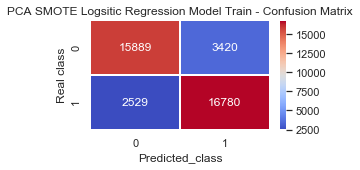


-------------------- Scores -----------------------------------
PCA SMOTE Logistic Regression Model Train Accuracy Score :  0.8459526645605676
PCA SMOTE Logistic Regression Model Train Precision Score : 0.8306930693069307
PCA SMOTE Logistic Regression Model Train Recall Score    : 0.8690248070847791
PCA SMOTE Logistic Regression Model Train AUC Score       : 0.8459526645605676
PCA SMOTE Logistic Regression Model Train Churn Accuracy Rate:(Sensitivity):  0.8690248070847791
PCA SMOTE Logistic Regression Model Train Not-Churn Accuracy Rate:(Specificity): 0.8228805220363561

----------------- PCA SMOTE Logistic Regression Model Train Classification Report -------------------
              precision    recall  f1-score   support

           0       0.86      0.82      0.84     19309
           1       0.83      0.87      0.85     19309

   micro avg       0.85      0.85      0.85     38618
   macro avg       0.85      0.85      0.85     38618
weighted avg       0.85      0.85      0.85    

In [137]:
 # Confusion Matrix for the SMOTE LR Model
cnf_matrix5= metrics.confusion_matrix(y_train_sm,lr_sm_train_predict)

# Draw Confusion Matrix for the basic model.
draw_confusion_matrix(cnf_matrix5,"PCA SMOTE Logsitic Regression Model Train - Confusion Matrix")

# Print the Other scores and Classification Reports.
model_report(y_train_sm,lr_sm_train_predict, "PCA SMOTE Logistic Regression Model Train")

#### 8.5.5: LR - SMOTE Model - Best hyper parameters - Test Predictions

In [138]:
# PCA SMOTE LR Model -  prediction in test data set.
start_time = datetime.datetime.now()

# predic the teset set with PCA SMOTE LR Model.
lr_sm_test_predict = lr_sm.predict(X_test_sm)

end_time = datetime.datetime.now()
train_time = end - start

print("Time taken for predicting the Test set - PCA SMOTE LR Model = "  + str(train_time))

Time taken for predicting the Test set - PCA SMOTE LR Model = 0:00:00.488692


#### 8.5.6: LR - SMOTE Model - Best hyper parameters  - Test Predictions Scores & ROC Curve.

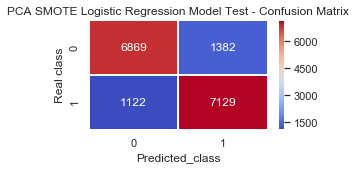


-------------------- Scores -----------------------------------
PCA SMOTE Logistic Regression Model Test  Accuracy Score :  0.8482608168706823
PCA SMOTE Logistic Regression Model Test  Precision Score : 0.8376219010692045
PCA SMOTE Logistic Regression Model Test  Recall Score    : 0.8640164828505635
PCA SMOTE Logistic Regression Model Test  AUC Score       : 0.8482608168706823
PCA SMOTE Logistic Regression Model Test  Churn Accuracy Rate:(Sensitivity):  0.8640164828505635
PCA SMOTE Logistic Regression Model Test  Not-Churn Accuracy Rate:(Specificity): 0.8325051508908011

----------------- PCA SMOTE Logistic Regression Model Test  Classification Report -------------------
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      8251
           1       0.84      0.86      0.85      8251

   micro avg       0.85      0.85      0.85     16502
   macro avg       0.85      0.85      0.85     16502
weighted avg       0.85      0.85      0.85    

In [139]:
# Confusion Matrix - SMOTE LR  Model - Test
cnf_matrix6= metrics.confusion_matrix(y_test_sm,lr_sm_test_predict)

# Draw Confusion Matrix for the SMOTE LR Model.
draw_confusion_matrix(cnf_matrix6,"PCA SMOTE Logistic Regression Model Test - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_test_sm,lr_sm_test_predict, "PCA SMOTE Logistic Regression Model Test ")

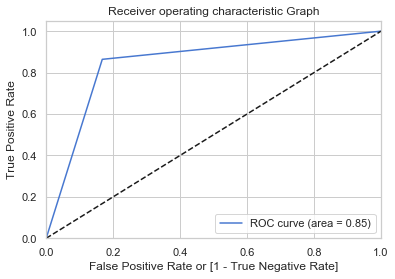

In [140]:
# Draw ROC Curve for SMOTE Logistic Regression Model - Test

draw_roc(y_test_sm,lr_sm_test_predict)

#### **Observations**<br>
> - We have run Logistic Regrssion using SMOTE technique and using gridsearch sampling achived best score of `0.84` and best parameter for C=10
> - We achieve the very good accuracy for approximately `0.85` for both PCA trainand test dataset.
> - An improved recall score `0.86` and overall  AUC score `0.85`.

#### **Inferences**<br>
> - So, overall we observe that ***`SMOTE produce best results so far using PCA logistic regression with reasonably good balanced pedictions and accuracy score `85%` compared other LR Models`***. 

## Step 9: Random Forest Model 

> - We try Random Forest Model with original X and y Train data set as it handles collinearity among features directly by subsamples of the feature space at each split of nodes. 

### 9.1: Random Forest Model - Basic Random Forest Classifier Model 

In [2]:
#fit the balance class weight model in train.
#start = datetime.datetime.now()

clf_rf_basic = RandomForestClassifier()

# Train the default model.
clf_rf_basic.fit(X_train, y_train)

#predict the model using test.
y_rf_pred_basic = clf_rf_basic.predict(X_test)

NameError: name 'RandomForestClassifier' is not defined

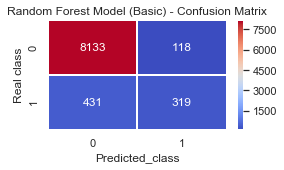


-------------------- Scores -----------------------------------
Random Forest Model (Basic)-Test Accuracy Score :  0.939006777024775
Random Forest Model (Basic)-Test Precision Score : 0.7299771167048055
Random Forest Model (Basic)-Test Recall Score    : 0.42533333333333334
Random Forest Model (Basic)-Test AUC Score       : 0.7055160182604129
Random Forest Model (Basic)-Test Churn Accuracy Rate:(Sensitivity):  0.42533333333333334
Random Forest Model (Basic)-Test Not-Churn Accuracy Rate:(Specificity): 0.9856987031874924

----------------- Random Forest Model (Basic)-Test Classification Report -------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.73      0.43      0.54       750

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.84      0.71      0.75      9001
weighted avg       0.93      0.94      0.93      9001



In [142]:
# Confusion Matrix - Random Forest LR  Model - Test
cnf_matrix8= metrics.confusion_matrix(y_test,y_rf_pred_basic)

# Draw Confusion Matrix for the SMOTE LR Model.
draw_confusion_matrix(cnf_matrix8,"Random Forest Model (Basic) - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_test,y_rf_pred_basic, "Random Forest Model (Basic)-Test")

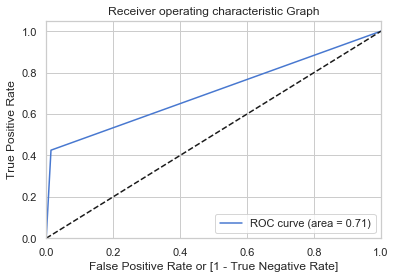

In [143]:
# Draw ROC Curve for Random Forest Model - Test
draw_roc(y_test,y_rf_pred_basic)

#### **Observations**
> - We have created a very basic Random Forest Classifer model with default parameters.
> - Train the model X_train and made prediction on the test.
> - We get the test accuracy of `0.94` and AUC Score of `0.71`

#### **Inference**
> - We run the Random Forest again by fine tuning each of the parameters using grid search and come up with an optimal set of values. The tuned parameters are are ;
    - `max_depth`
    - `n_estimators`
    - `max_features`
    - `min_samples_leaf`
    - `min_samples_split`
> - Also, finally we used class_weight parameter to handle the class imbalances in sample.

### 9.2: Random Forest - Generic Functions for GridSerach Tuning and Plot Best Params 

#### 9.2.1: Generic Function - Handling GridSearchCV 5 fold CV 

In [144]:
# A common function to carry GridSearchCV 5 fold cross validation.

def rfGridSearchCVTuning(parameters, X_train, y_train, n_folds = 5, n_jobs = -1):
    np.random.seed(0)
    param = list(parameters.keys())[0]
    print("param: ", param)
    # Train the training data
    if((param == 'max_features') | (param == 'n_estimators')):
        rfc = RandomForestClassifier(max_depth=4)
    else:
        rfc = RandomForestClassifier()
        
    rfc = GridSearchCV(rfc, parameters, 
                       cv=n_folds, 
                       scoring="accuracy",
                       return_train_score=True,
                       verbose=5,
                       n_jobs = n_jobs)
        
    rfc.fit(X_train, y_train)
    return rfc

#### 9.2.2: Generic Function - Plot Best CV parameter results for Tuning 

In [145]:
def plot_rf_best_params(parameters,rfc):
    param = list(parameters.keys())[0]
    if(len(list(parameters.keys())) == 1):
        scores = rfc.cv_results_
        scoreParam = "param_" + list(parameters.keys())[0] 

        plt.figure()
        plt.plot(scores[scoreParam].astype('float32'), 
                 scores["mean_train_score"], 
                 label="training accuracy")
        
        plt.plot(scores[scoreParam].astype('float32'), 
                 scores["mean_test_score"], 
                 label="test accuracy")
        plt.xlabel(param)
        plt.ylabel("Accuracy")
        plt.legend()
        plt.grid(True)
        plt.show();

#### 9.2.3: Random Forest - Tuning max_depth Parameter

In [146]:
# Best Max dept parameters.
parameters = {'max_depth': range(2,30, 5)}
cv_rf_1 = rfGridSearchCVTuning(parameters, X_train, y_train)

param:  max_depth
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.5s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.5s finished


In [147]:
# print the best scores and params.
gridsearch_best_params(cv_rf_1)


----- Best Score & params ----
Best score: 0.9434761904761905 
Best Param: {'max_depth': 7}


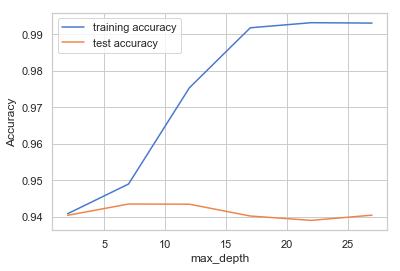

In [148]:
# Plot the Best max depth parameter.
plot_rf_best_params(parameters,cv_rf_1)

#### **Observations**<br>
>- We have best max_depth parameter of `7` and having best score of  `0.94`. As in test increases until 7 and then drops off.

#### 9.2.4: Random Forest - Tuning n_estimators Parameter

In [149]:
# Tuning Hyper parameter n_estimators for the RF model.
parameters = {'n_estimators': range(100, 1500, 400)}
cv_rf_2 = rfGridSearchCVTuning(parameters, X_train, y_train)

param:  n_estimators
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done  18 out of  20 | elapsed:  1.6min remaining:   10.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  2.0min finished



----- Best Score & params ----
Best score: 0.9437142857142857 
Best Param: {'n_estimators': 500}


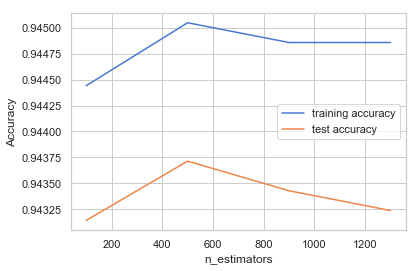

In [150]:
# print the best scores and params.
gridsearch_best_params(cv_rf_2)

# Plot the Best max depth parameter.
plot_rf_best_params(parameters,cv_rf_2)

#### **Observations**<br>
>- We have best n_estimators parameter `900` and having best score of  `0.943`. The process takes around 2 minutes to complete.

#### 9.2.5: Random Forest - Tuning max_features Parameter

In [151]:
# Maximum Features 
parameters = {'max_features': [4, 8, 14, 20, 24, 28, 32]}
cv_rf_3 = rfGridSearchCVTuning(parameters, X_train, y_train)

param:  max_features
Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    6.3s finished



----- Best Score & params ----
Best score: 0.9435714285714286 
Best Param: {'max_features': 24}


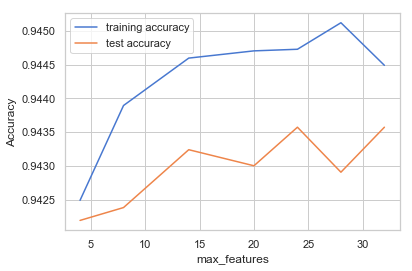

In [152]:
# print the best scores and params.
gridsearch_best_params(cv_rf_3)

# Plot the Best max depth parameter.
plot_rf_best_params(parameters,cv_rf_3)

#### **Observations**<br>
>- We have best max_features parameter of `28` and having best score of  `0.94`. 

#### 9.2.6: Random Forest - min_samples_leaf Parameter

In [153]:
parameters = {'min_samples_leaf': range(50, 400, 40)}
cv_rf_4 = rfGridSearchCVTuning(parameters, X_train, y_train)

param:  min_samples_leaf
Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    7.3s finished



----- Best Score & params ----
Best score: 0.943 
Best Param: {'min_samples_leaf': 250}


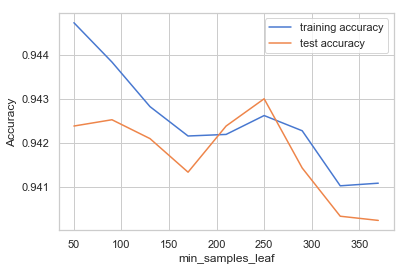

In [154]:
# print the best scores and params.
gridsearch_best_params(cv_rf_4)

# Plot the Best max depth parameter.
plot_rf_best_params(parameters,cv_rf_4)

#### **Observations**<br>
>- We have best min_samples_leaf parameter of `50`and having best score of  `0.943`. 

#### 9.2.7: Random Forest - min_samples_split Parameter

In [155]:
parameters = {'min_samples_split': range(200, 500, 50)}
cv_rf_5 = rfGridSearchCVTuning(parameters, X_train, y_train)

param:  min_samples_split
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.6s finished



----- Best Score & params ----
Best score: 0.942952380952381 
Best Param: {'min_samples_split': 250}


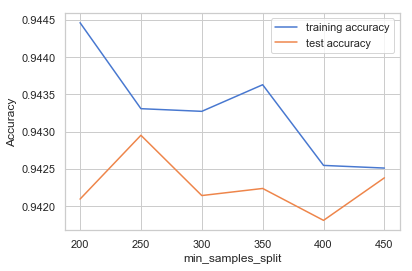

In [156]:
# print the best scores and params.
gridsearch_best_params(cv_rf_5)

# Plot the Best max depth parameter.
plot_rf_best_params(parameters,cv_rf_5)

#### **Observations**<br>
>- We have best min_samples_split parameter of `300`and having best score of  `0.943`. 

### 9.3: Random Forest - Use the Optimal Parameters for Model

In [157]:
# Random Forest Optimal Parameters Model - Train set.

# Random Forest Classifier model optimuum parameters.
rfc_train_final = RandomForestClassifier(bootstrap=True,
                                            max_depth=7,
                                       n_estimators=900,
                                        max_features=28,
                                    min_samples_leaf=50, 
                                  min_samples_split=300,
                                              n_jobs=-1,
                                               verbose=1)

# fit final rf model
rfc_train_final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   41.8s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=28, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=300,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [158]:
# Making predictions for train & test with the final model
y_pred_rfc_train_final = rfc_train_final.predict(X_train) 
y_pred_rfc_test_final = rfc_train_final.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.2s finished


#### 9.3.1: Random Forest  - Use the Optimal Parameters for Model - Train - Prediction Scores & Report

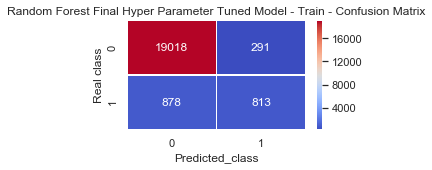


-------------------- Scores -----------------------------------
Random Forest Final Hyper Parameter Tuned Model - Train Accuracy Score :  0.9443333333333334
Random Forest Final Hyper Parameter Tuned Model - Train Precision Score : 0.7364130434782609
Random Forest Final Hyper Parameter Tuned Model - Train Recall Score    : 0.4807806031933767
Random Forest Final Hyper Parameter Tuned Model - Train AUC Score       : 0.7328549553850772
Random Forest Final Hyper Parameter Tuned Model - Train Churn Accuracy Rate:(Sensitivity):  0.4807806031933767
Random Forest Final Hyper Parameter Tuned Model - Train Not-Churn Accuracy Rate:(Specificity): 0.9849293075767777

----------------- Random Forest Final Hyper Parameter Tuned Model - Train Classification Report -------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     19309
           1       0.74      0.48      0.58      1691

   micro avg       0.94      0.94      0.94     21000
   

In [159]:
# Build Confusion Matrix - Random Forest Tuned hyper parameter Model - Test predictions.
cnf_matrix_train_rf= metrics.confusion_matrix(y_train,y_pred_rfc_train_final)

# Draw Confusion Matrix for the Random Forest Tuned Hyper parameter Model - Test
draw_confusion_matrix(cnf_matrix_train_rf,"Random Forest Final Hyper Parameter Tuned Model - Train - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_train,y_pred_rfc_train_final, "Random Forest Final Hyper Parameter Tuned Model - Train") 

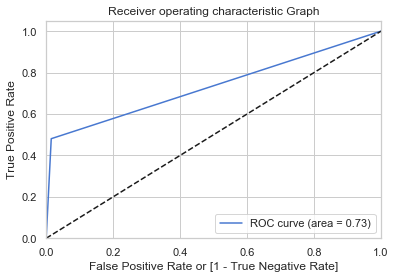

In [160]:
# Draw ROC Curve for Random Forest Final Tuned Hyper Parameter Model - Train set.
draw_roc(y_train,y_pred_rfc_train_final)

#### 9.3.2: Random Forest  - Use the Optimal Parameters for Model - Test - Prediction Scores & Report

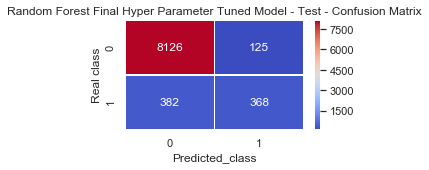


-------------------- Scores -----------------------------------
Random Forest Final Hyper Parameter Tuned Model - Test Accuracy Score :  0.9436729252305299
Random Forest Final Hyper Parameter Tuned Model - Test Precision Score : 0.7464503042596349
Random Forest Final Hyper Parameter Tuned Model - Test Recall Score    : 0.49066666666666664
Random Forest Final Hyper Parameter Tuned Model - Test AUC Score       : 0.7377584939199289
Random Forest Final Hyper Parameter Tuned Model - Test Churn Accuracy Rate:(Sensitivity):  0.49066666666666664
Random Forest Final Hyper Parameter Tuned Model - Test Not-Churn Accuracy Rate:(Specificity): 0.9848503211731912

----------------- Random Forest Final Hyper Parameter Tuned Model - Test Classification Report -------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8251
           1       0.75      0.49      0.59       750

   micro avg       0.94      0.94      0.94      9001
   macro

In [161]:
# Build Confusion Matrix - Random Forest Tuned hyper parameter Model - Test predictions.
cnf_matrix_test_rf= metrics.confusion_matrix(y_test,y_pred_rfc_test_final)

# Draw Confusion Matrix for the Random Forest Tuned Hyper parameter Model - Test
draw_confusion_matrix(cnf_matrix_test_rf,"Random Forest Final Hyper Parameter Tuned Model - Test - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_test,y_pred_rfc_test_final, "Random Forest Final Hyper Parameter Tuned Model - Test")

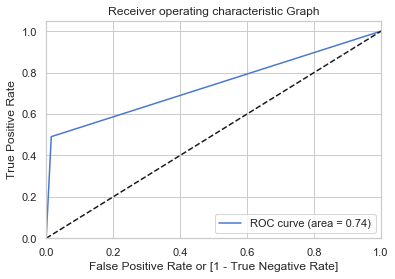

In [162]:
# Draw ROC Curve for Random Forest Final Tuned Hyper Parameter Model 
draw_roc(y_test,y_pred_rfc_test_final)

#### **Observations**
>- We have fine tuned import hyper parameters for the Random Forest Classifer and obtain best optimal hyperparameters as below;
   - max_depth=7
   - n_estimators=900
   - max_features=28
   - min_samples_leaf=50
   - min_samples_split=300
>- We have obtained ;
   - accuracy score for train and test set as `0.944` respecively.
   - Precision Score for train and test as `0.736` and `0.748` respectively.
   - Recall Score for train and test set as `0.480` and `0.494` respectively.
   - AUC Score for train and test set as `0.733` and `.740` respectively.
> - As we notice that the recall score for the churned (class-1) are very low due class imbalance.
#### **Inference**
> - We will run the model again with class_weight parameter.

### 9.4: Random Forest - Use the Optimal Parameters with class_weight parameter (class imbalance)

In [163]:
 
#start_time = datetime.datetime.now()

# Random Forest Classifier model optimuum parameters.
rfc_class_final = RandomForestClassifier(bootstrap=True,
                                            max_depth=7,
                                       n_estimators=900,
                                        max_features=28,
                                    min_samples_leaf=50, 
                                  min_samples_split=300,
                                class_weight='balanced',
                                              n_jobs=-1,
                                              verbose=1)


# fit final Random Forest final class weight parameter model
rfc_class_final.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:   39.6s finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=7, max_features=28,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=50,
            min_samples_split=300, min_weight_fraction_leaf=0.0,
            n_estimators=900, n_jobs=-1, oob_score=False,
            random_state=None, verbose=1, warm_start=False)

In [164]:
# Making predictions for the final model (both train and test)
y_pred_rfc_train_class_final = rfc_class_final.predict(X_train)
y_pred_rfc_test_class_final =  rfc_class_final.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.2s finished


#### 9.4.1: Random Forest  - Use the Optimal Parameters with class_weight - Train - Prediction Scores 

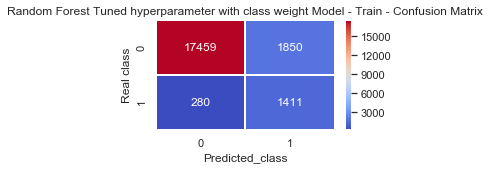


-------------------- Scores -----------------------------------
Random Forest Tuned hyperparameter with class weight Model Train Accuracy Score :  0.8985714285714286
Random Forest Tuned hyperparameter with class weight Model Train Precision Score : 0.432689359092303
Random Forest Tuned hyperparameter with class weight Model Train Recall Score    : 0.8344175044352454
Random Forest Tuned hyperparameter with class weight Model Train AUC Score       : 0.8693036302537717
Random Forest Tuned hyperparameter with class weight Model Train Churn Accuracy Rate:(Sensitivity):  0.8344175044352454
Random Forest Tuned hyperparameter with class weight Model Train Not-Churn Accuracy Rate:(Specificity): 0.9041897560722979

----------------- Random Forest Tuned hyperparameter with class weight Model Train Classification Report -------------------
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     19309
           1       0.43      0.83      0.57      1

In [165]:
# Build Confusion Matrix - Random Forest Tuned hyper parameter with class weight parameter Model - Train predictions.
cnf_matrix_train_class_rf= metrics.confusion_matrix(y_train,y_pred_rfc_train_class_final)

# Draw Confusion Matrix for the Random Forest Tuned Hyper parameter Model - Train
draw_confusion_matrix(cnf_matrix_train_class_rf,
                      "Random Forest Tuned hyperparameter with class weight Model - Train - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_train,y_pred_rfc_train_class_final, "Random Forest Tuned hyperparameter with class weight Model Train")

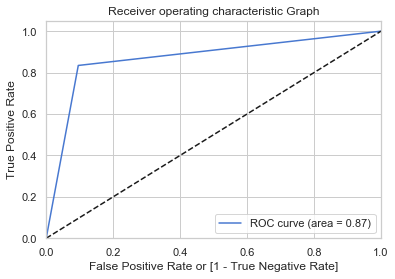

In [166]:
# Draw ROC Curve for Random Forest Tuned hyper parameter with class weight parameter Model - Train
draw_roc(y_train,y_pred_rfc_train_class_final)

#### 9.4.2: Random Forest - Use the Optimal Parameters with class_weight - Test - Prediction Scores 

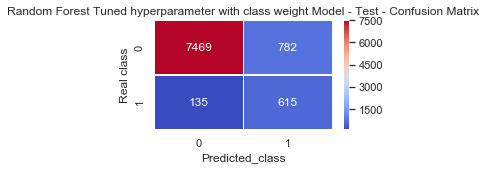


-------------------- Scores -----------------------------------
Random Forest Tuned hyperparameter with class weight Model Test Accuracy Score :  0.8981224308410176
Random Forest Tuned hyperparameter with class weight Model Test Precision Score : 0.44022906227630637
Random Forest Tuned hyperparameter with class weight Model Test Recall Score    : 0.82
Random Forest Tuned hyperparameter with class weight Model Test AUC Score       : 0.8626118046297417
Random Forest Tuned hyperparameter with class weight Model Test Churn Accuracy Rate:(Sensitivity):  0.82
Random Forest Tuned hyperparameter with class weight Model Test Not-Churn Accuracy Rate:(Specificity): 0.9052236092594838

----------------- Random Forest Tuned hyperparameter with class weight Model Test Classification Report -------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8251
           1       0.44      0.82      0.57       750

   micro avg       0.90     

In [167]:
# Build Confusion Matrix - Random Forest Tuned hyper parameter with class weight parameter Model - Test predictions.
cnf_matrix_test_class_rf= metrics.confusion_matrix(y_test,y_pred_rfc_test_class_final)

# Draw Confusion Matrix for the Random Forest Tuned Hyper parameter Model - Test
draw_confusion_matrix(cnf_matrix_test_class_rf,
                      "Random Forest Tuned hyperparameter with class weight Model - Test - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_test,y_pred_rfc_test_class_final, "Random Forest Tuned hyperparameter with class weight Model Test")

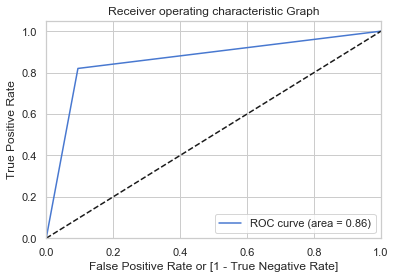

In [168]:
# Draw ROC Curve for Random Forest Tuned hyper parameter with class weight parameter Model - Test
draw_roc(y_test,y_pred_rfc_test_class_final)

#### **Observations**
>- We have re modelled optimal hyper parameters model by including class_weighet parameter.
>- We have obtained an improved score for both train and test set as follows;
   - accuracy score for train and test set as `0.900` respecively.
   - Precision Score for train and test as `0.436` and `0.441` respectively.
   - Recall Score has imrpoved for train and test set as `0.835` and `0.817` respectively.
   - AUC Score for train and test set as `0.870` and `.861` respectively.
> - As we notice that both AUC and recall score has improved considerably using class_weight parameter.
#### **inferences**
> - A Model with SMOTE Samples to increase accuracy
> - Let us see the Important Features predicted using the Random Forest Model.

### 9.5: Random Forest Model - With SMOTE 

#### 9.5.1: Random Forest - Create SMOTE Samples

In [169]:
### Create an instance of SMOTE.
smote = SMOTE(random_state=2)

# Generate SMOTE Sample data
X_train_smote,y_train_smote = smote.fit_sample(X_train,y_train)
X_test_smote,y_test_smote =   smote.fit_sample(X_test,y_test)

#print the distribution of samples before & after SMOTE.
print('Distribution of class labels before sampling - Train ', Counter(y_train))
print('Distribution of class labels After sampling - Train', Counter(y_train_smote))
print('Distribution of class labels before sampling - Test', Counter(y_test))
print('Distribution of class labels After sampling - Test', Counter(y_test_smote))

Distribution of class labels before sampling - Train  Counter({0: 19309, 1: 1691})
Distribution of class labels After sampling - Train Counter({0: 19309, 1: 19309})
Distribution of class labels before sampling - Test Counter({0: 8251, 1: 750})
Distribution of class labels After sampling - Test Counter({1: 8251, 0: 8251})


#### 9.5.2: Random Forest Model - Using SMOTE Samples

In [170]:
# Random Forest Classifier model optimum parameters.
rf_smote = RandomForestClassifier(bootstrap=True,
                                     max_depth=7,
                                n_estimators=900,
                                 max_features=28,
                             min_samples_leaf=50, 
                           min_samples_split=300,
                                       n_jobs=-1,
                                        verbose=1)

# fit final Random Forest class weight parameter model to SMOTE Samples.
rf_smote.fit(X_train_smote,y_train_smote)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  1.4min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features=28, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=300,
            min_weight_fraction_leaf=0.0, n_estimators=900, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

In [171]:
# Making predictions for the final model (both train and test)
y_pred_rf_train_smote = rf_smote.predict(X_train)
y_pred_rf_test_smote =  rf_smote.predict(X_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.4s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 900 out of 900 | elapsed:    0.2s finished


#### 9.5.3: Random Forest Moel - SMOTE - Train - Prediction Scores 

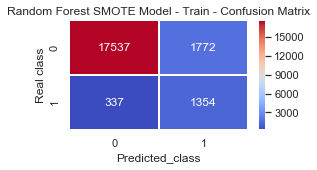


-------------------- Scores -----------------------------------
Random Forest SMOTE Model - Train Accuracy Score :  0.8995714285714286
Random Forest SMOTE Model - Train Precision Score : 0.4331413947536788
Random Forest SMOTE Model - Train Recall Score    : 0.8007096392667061
Random Forest SMOTE Model - Train AUC Score       : 0.8544694811901401
Random Forest SMOTE Model - Train Churn Accuracy Rate:(Sensitivity):  0.8007096392667061
Random Forest SMOTE Model - Train Not-Churn Accuracy Rate:(Specificity): 0.908229323113574

----------------- Random Forest SMOTE Model - Train Classification Report -------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     19309
           1       0.43      0.80      0.56      1691

   micro avg       0.90      0.90      0.90     21000
   macro avg       0.71      0.85      0.75     21000
weighted avg       0.94      0.90      0.91     21000



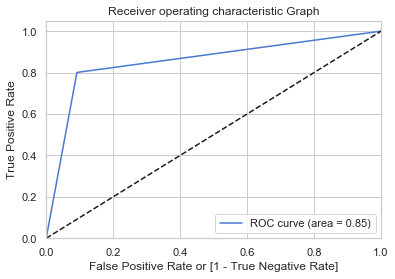

In [172]:
# Build Confusion Matrix - Random Forest Tuned hyper parameter with class weight parameter Model - Train predictions.
cnf_mtx_rf_train_smote =  metrics.confusion_matrix(y_train,y_pred_rf_train_smote)

# Draw Confusion Matrix for the Random Forest Tuned Hyper parameter Model - Train
draw_confusion_matrix(cnf_mtx_rf_train_smote,
                      "Random Forest SMOTE Model - Train - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_train,y_pred_rf_train_smote, "Random Forest SMOTE Model - Train")


# Draw ROC Curve for Random Forest Tuned hyper parameter with class weight parameter Model - Train
draw_roc(y_train,y_pred_rf_train_smote)

#### 9.5.4: Random Forest Moel - SMOTE - Test - Prediction Scores 

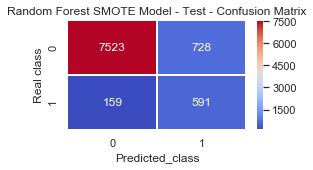


-------------------- Scores -----------------------------------
Random Forest SMOTE Model - Test Accuracy Score :  0.9014553938451283
Random Forest SMOTE Model - Test Precision Score : 0.44806671721000757
Random Forest SMOTE Model - Test Recall Score    : 0.788
Random Forest SMOTE Model - Test AUC Score       : 0.8498841352563327
Random Forest SMOTE Model - Test Churn Accuracy Rate:(Sensitivity):  0.788
Random Forest SMOTE Model - Test Not-Churn Accuracy Rate:(Specificity): 0.9117682705126652

----------------- Random Forest SMOTE Model - Test Classification Report -------------------
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      8251
           1       0.45      0.79      0.57       750

   micro avg       0.90      0.90      0.90      9001
   macro avg       0.71      0.85      0.76      9001
weighted avg       0.94      0.90      0.91      9001



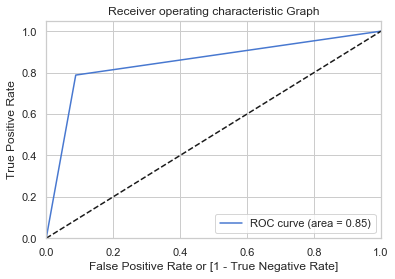

In [173]:
# Build Confusion Matrix - Random Forest SMOTE Model - Train predictions.
cnf_mtx_rf_test_smote =  metrics.confusion_matrix(y_test,y_pred_rf_test_smote)

# Draw Confusion Matrix for the Random Forest SMOTE Model - Test
draw_confusion_matrix(cnf_mtx_rf_test_smote,
                      "Random Forest SMOTE Model - Test - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_test,y_pred_rf_test_smote, "Random Forest SMOTE Model - Test")


# Draw ROC Curve for Random Forest SMOTE Model - Train
draw_roc(y_test,y_pred_rf_test_smote)

#### **Observations**
>- A Random Forest Model created using SMOTE sampling.
>- We have obtained a good score for both train and test set as follows;
   - accuracy score for train and test set as `0.90` respecively.
   - Precision Score for train and test as `0.431` and `0.445` respectively.
   - Recall Score has imrpoved for train and test set as `0.800` and `0.785` respectively.
   - AUC Score for train and test set as `0.85`.
   and Specificity 

### 9.6: Random Forest - Identify Important Features 

In [174]:
# Fetch the important features from the model.
importances = rf_smote.feature_importances_

feature_df = pd.DataFrame(X_train.columns.values[(np.argsort(importances)[::-1])[:15]]) # the top 24 features
feature_df.columns =['Features'] 

#print top 28 features.
feature_df

,Features
0,total_ic_mou_8
1,loc_ic_mou_8
2,roam_og_mou_8
3,loc_ic_t2m_mou_8
4,total_rech_amt_8
5,roam_ic_mou_8
6,total_rech_data_amt_8
7,arpu_8
8,last_day_rch_amt_8
9,loc_og_mou_8


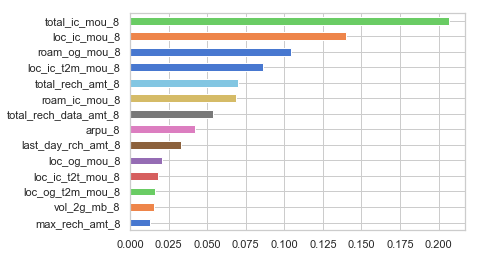

In [175]:
X =X_train.columns.values

weights = pd.Series(importances,
                 index=X)

weights.sort_values()[-14:].plot(kind = 'barh');

#### **Observations**
> -  From Random forest Models the important features and most important predictor driver variables to predict churn are ;
     - Local Incoming and outgoing Minutes of usages for Month 8
     - roaming incoming and outgoing minutes of usages for month 8
     - total recharge amount (call & data) for month 8
     - Average Revenue Per Customer for Month 8
     - last day on which recharge made on month 8 by the customer
     - maximum recharge amount for month 8, by the customer 
     - volume of 2g data for the month 8 used by the customer
       most important predictor variables to predict churn.
> - The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA , but with increased accuracy.

## Step 10: Decision Tree

> - We try Decision Tree Model with original X and y Train data set as Trees can be visualised, which makes them easy to interpret.They can handle numerical and categorical data. We can easily validate the model using statistical tests
> - Let's first build a decision tree with default hyperparameters. Then we'll use cross-validation to tune them.

### 10.1: Decision Tree - All Default Parameters (except with max_depth=5) 

In [176]:
# Importing decision tree classifier confusion matrix and classification report libraries.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Importing required packages for visualization Decision Trees.
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [177]:
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5)

#Fit the default dt model to train.
dt_default.fit(X_train, y_train)

# Making predictions with test
y_pred_dt_default = dt_default.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

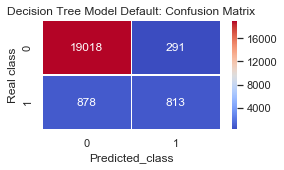


-------------------- Scores -----------------------------------
Decision Tree Model Default: Accuracy Score :  0.9427841350961005
Decision Tree Model Default: Precision Score : 0.730844793713163
Decision Tree Model Default: Recall Score    : 0.496
Decision Tree Model Default: AUC Score       : 0.7396979760029088
Decision Tree Model Default: Churn Accuracy Rate:(Sensitivity):  0.496
Decision Tree Model Default: Not-Churn Accuracy Rate:(Specificity): 0.9833959520058175

----------------- Decision Tree Model Default: Classification Report -------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      8251
           1       0.73      0.50      0.59       750

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.84      0.74      0.78      9001
weighted avg       0.94      0.94      0.94      9001



In [178]:
# Build and print Confusion Matrix and accuracy - Default Decision Tree Model 
cnf_matrix_train_class_dt = metrics.confusion_matrix(y_test,y_pred_dt_default)
draw_confusion_matrix(cnf_matrix_train_rf,"Decision Tree Model Default: Confusion Matrix")

# Print scores and Classification Report.
model_report(y_test,y_pred_dt_default, "Decision Tree Model Default:")

#### **Observations**
> - A decision tree model with default parameters and max_depth=5 is created and obtain an accuracy score `0.94`.
> - We can imporve the model by fine tuning hyperparameters.

### 10.2: Plotting the Decision Tree Features - Default Model 

In [179]:
#Get the feature set.
X_train.shape
features = list(X_train.columns)

(21000, 83)

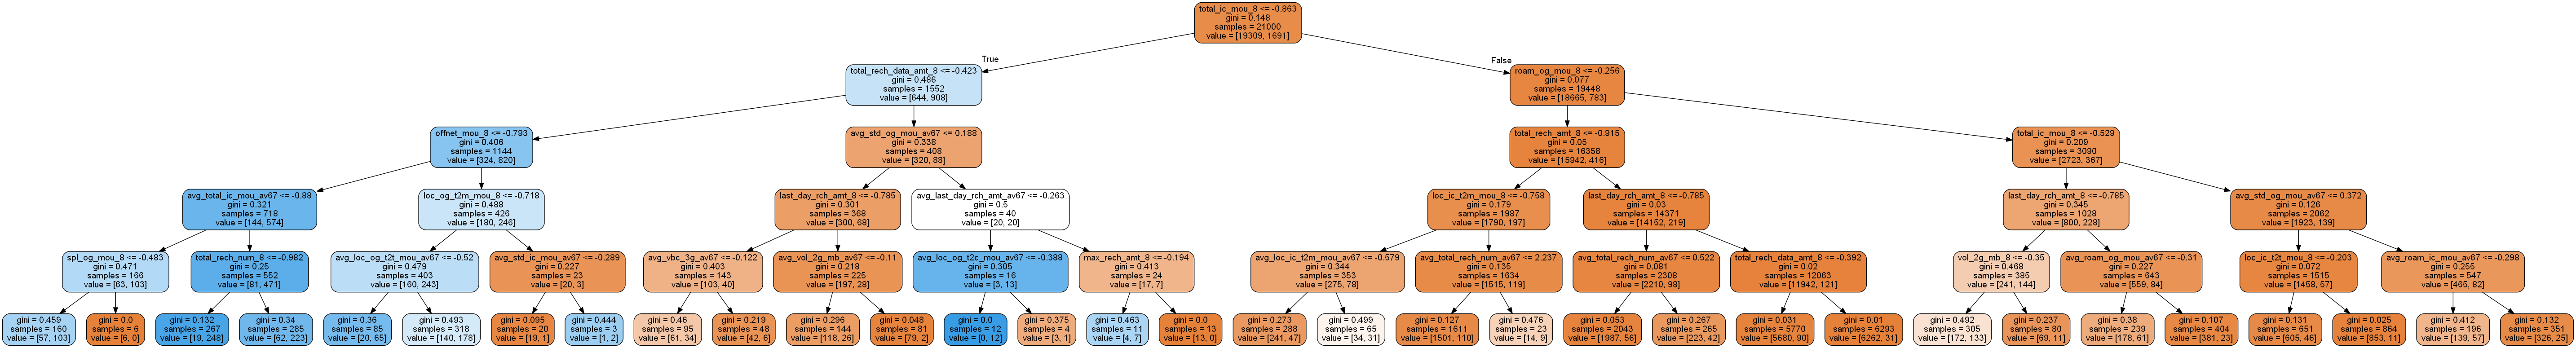

In [180]:
# plotting tree with max_depth=3
dot_data = StringIO()  
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 10.3: Tuning hyper parameter max_depth 
> Let's first try to find the optimum values for max_depth and understand how the value of max_depth affects the decision tree.

In [181]:
# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dtree1 = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
gs_tree1 = GridSearchCV(dtree1, parameters, 
                    cv=5, 
                    n_jobs=-1,
                    verbose=1,
                    scoring="accuracy")
#fit the train.
gs_tree1.fit(X_train, y_train)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 195 out of 195 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(1, 40)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=1)


----- Best Score & params ----
Best score: 0.943 
Best Param: {'max_depth': 4}


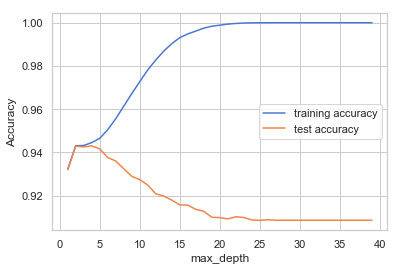

In [182]:
# print the best scores and params.
gridsearch_best_params(gs_tree1)

# Plot the Best max depth parameter.
plot_rf_best_params(parameters,gs_tree1)

#### **Observations**<br>
>- We have best max_depth parameter of `4`or `5` and having best score of  `0.94`. As in test increases until 5 and then drops off.

### 10.4: Tuning hyper parameter min_samples_leaf

In [183]:
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree2 = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
gs_tree2 = GridSearchCV(dtree2, parameters, 
                    cv=5, 
                    n_jobs=-1,
                    verbose=1,
                   scoring="accuracy")

#fit the grid to train 
gs_tree2.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   15.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_leaf': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)


----- Best Score & params ----
Best score: 0.9428571428571428 
Best Param: {'min_samples_leaf': 185}


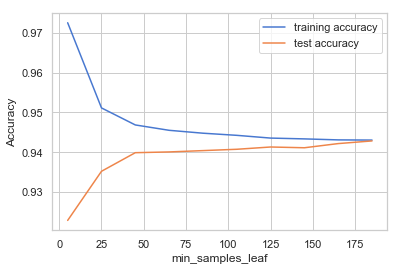

In [184]:
# print the best scores and params.
gridsearch_best_params(gs_tree2)

# Plot the Best max depth parameter.
plot_rf_best_params(parameters,gs_tree2)

#### **Observations**
> - A decision tree model with best param min_samples_leaf of `185` to get accuracy score of `0.94`.

### 10.5: Tuning hyper parameter min_samples_split

In [185]:
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree3 = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
gs_tree3 = GridSearchCV(dtree3, parameters,
                    cv=5, 
                    n_jobs=-1,
                    verbose=1,
                   scoring="accuracy")
gs_tree3.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   20.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': range(5, 200, 20)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)


----- Best Score & params ----
Best score: 0.9365238095238095 
Best Param: {'min_samples_split': 185}


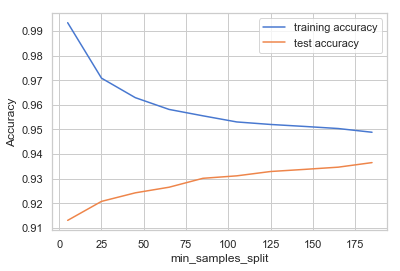

In [186]:
# print the best scores and params.
gridsearch_best_params(gs_tree3)

# Plot the Best max depth parameter.
plot_rf_best_params(parameters,gs_tree3)

#### **Observations**
>- We have best min_samples_split parameter of `185`and having best score of  `0.94`.

### 10.6: Grid Search to Find Optimal Hyperparameters

In [187]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

# Instantiate the grid search model
dtree_final = DecisionTreeClassifier()
gs_final = GridSearchCV(estimator = dtree_final, param_grid = param_grid, 
                          cv = 5, n_jobs=-1,verbose = 1)

# Fit the grid search to the data
gs_final.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   19.2s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [188]:
# print the best scores and params.
gridsearch_best_params(gs_final)


----- Best Score & params ----
Best score: 0.9416666666666667 
Best Param: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}


### 10.7: Running the DT model with best parameters obtained from grid search (max_depth=5)

In [189]:
# model with optimal hyperparameters
dt_clf_final = DecisionTreeClassifier(criterion = "entropy", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
dt_clf_final.fit(X_train, y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [190]:
# make prediction on Test Data using dt_clf_final
y_pred_dt_final=dt_clf_final.predict(X_test)

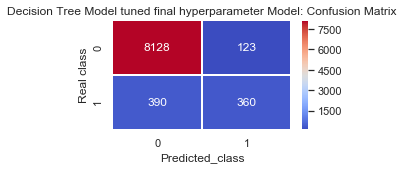


-------------------- Scores -----------------------------------
Decision Tree Model tuned final hyperparameter Model Accuracy Score :  0.9430063326297078
Decision Tree Model tuned final hyperparameter Model Precision Score : 0.7453416149068323
Decision Tree Model tuned final hyperparameter Model Recall Score    : 0.48
Decision Tree Model tuned final hyperparameter Model AUC Score       : 0.73254635801721
Decision Tree Model tuned final hyperparameter Model Churn Accuracy Rate:(Sensitivity):  0.48
Decision Tree Model tuned final hyperparameter Model Not-Churn Accuracy Rate:(Specificity): 0.9850927160344201

----------------- Decision Tree Model tuned final hyperparameter Model Classification Report -------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.75      0.48      0.58       750

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.85      0.73      0.78      9001


In [191]:
# Build and print Confusion Matrix and accuracy - final tuned hyper parameter model
cnf_matrix_test_dt = metrics.confusion_matrix(y_test,y_pred_dt_final)
draw_confusion_matrix(cnf_matrix_test_dt,"Decision Tree Model tuned final hyperparameter Model: Confusion Matrix")

# Print scores and Classification Report.
model_report(y_test,y_pred_dt_final, "Decision Tree Model tuned final hyperparameter Model")

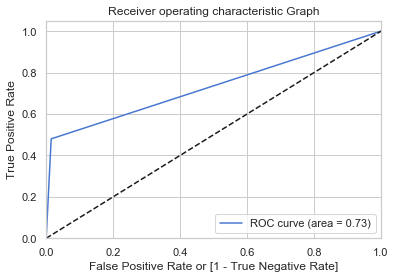

In [192]:
# ROC curve for the final Decision Tree Model.
draw_roc(y_test,y_pred_dt_final)

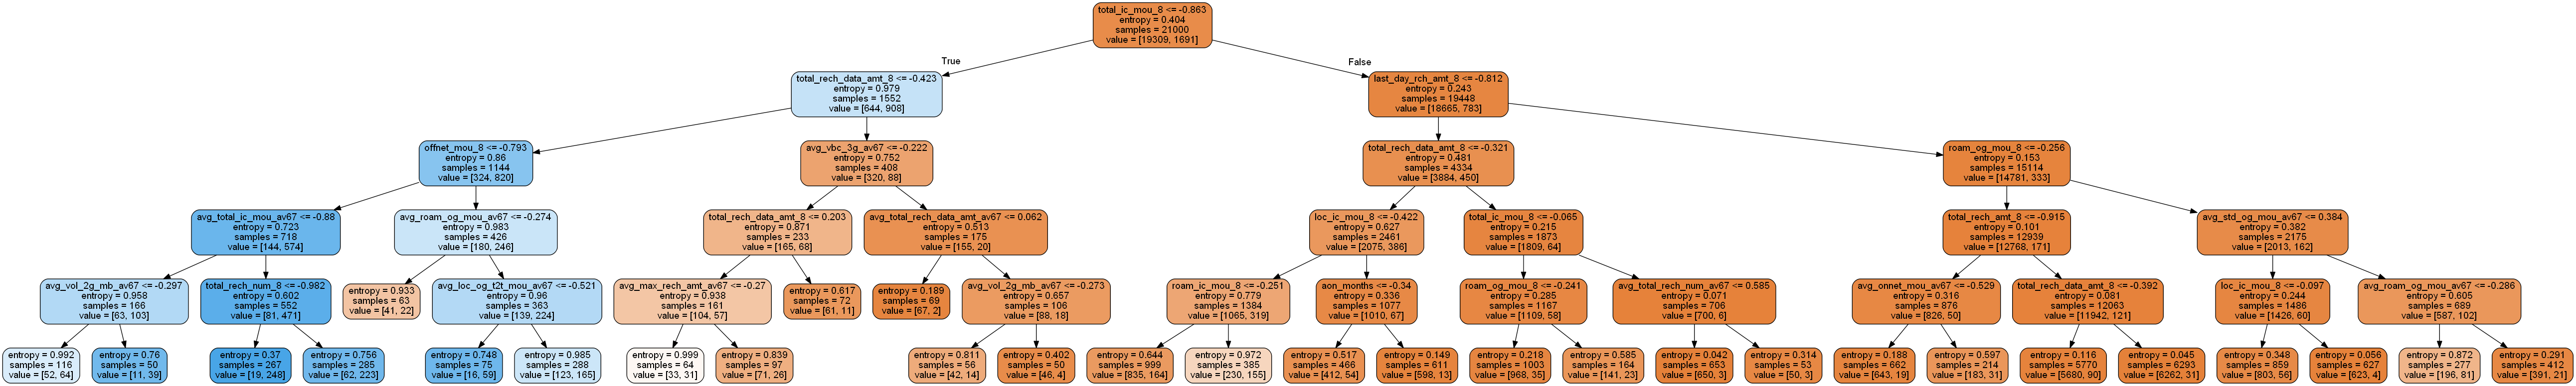

In [193]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(dt_clf_final, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### 10.8: Running the DT model with best parameters obtained from grid search (max_depth=4)

In [194]:
# tree with max_depth = 4
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=4, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

clf_gini.fit(X_train, y_train)

# score
print(clf_gini.score(X_test,y_test))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

0.9430063326297078


In [195]:
# make prediction on Test Data using dt_clf_final
y_pred_train_clf_gini =clf_gini.predict(X_train)
y_pred_test_clf_gini=clf_gini.predict(X_test)

#### 10.8.1: Decision Tree - Final - Train  Prediction Scores 

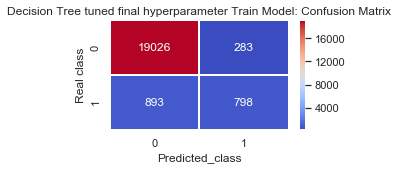


-------------------- Scores -----------------------------------
Decision Tree tuned final hyperparameter Train Model Accuracy Score :  0.944
Decision Tree tuned final hyperparameter Train Model Precision Score : 0.7382053654024052
Decision Tree tuned final hyperparameter Train Model Recall Score    : 0.47191011235955055
Decision Tree tuned final hyperparameter Train Model AUC Score       : 0.7286268672523322
Decision Tree tuned final hyperparameter Train Model Churn Accuracy Rate:(Sensitivity):  0.47191011235955055
Decision Tree tuned final hyperparameter Train Model Not-Churn Accuracy Rate:(Specificity): 0.9853436221451137

----------------- Decision Tree tuned final hyperparameter Train Model Classification Report -------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     19309
           1       0.74      0.47      0.58      1691

   micro avg       0.94      0.94      0.94     21000
   macro avg       0.85      0.73  

In [196]:
# Build and print Confusion Matrix and accuracy - final tuned hyper parameter model(max_depth=4,criterion=gini)
cnf_matrix_train_gini_dt = metrics.confusion_matrix(y_train,y_pred_train_clf_gini)
draw_confusion_matrix(cnf_matrix_train_gini_dt,
                      "Decision Tree tuned final hyperparameter Train Model: Confusion Matrix")

# Print scores and Classification Report.
model_report(y_train,y_pred_train_clf_gini, "Decision Tree tuned final hyperparameter Train Model")

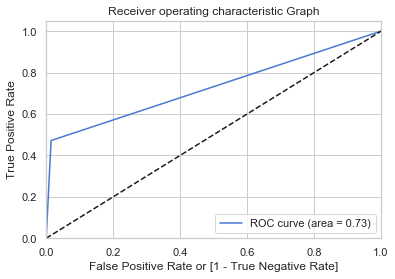

In [197]:
# ROC curve for the final Test Decision Tree Model.
draw_roc(y_train,y_pred_train_clf_gini)

#### 10.8.2: Decision Tree - Final- Test Prediction Scores 

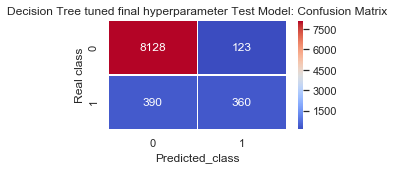


-------------------- Scores -----------------------------------
Decision Tree tuned final hyperparameter Test Model Accuracy Score :  0.9430063326297078
Decision Tree tuned final hyperparameter Test Model Precision Score : 0.7453416149068323
Decision Tree tuned final hyperparameter Test Model Recall Score    : 0.48
Decision Tree tuned final hyperparameter Test Model AUC Score       : 0.73254635801721
Decision Tree tuned final hyperparameter Test Model Churn Accuracy Rate:(Sensitivity):  0.48
Decision Tree tuned final hyperparameter Test Model Not-Churn Accuracy Rate:(Specificity): 0.9850927160344201

----------------- Decision Tree tuned final hyperparameter Test Model Classification Report -------------------
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8251
           1       0.75      0.48      0.58       750

   micro avg       0.94      0.94      0.94      9001
   macro avg       0.85      0.73      0.78      9001
weighte

In [198]:
# Build and print Confusion Matrix and accuracy - final tuned hyper parameter model(max_depth=4,criterion=gini)
cnf_matrix_test_gini_dt = metrics.confusion_matrix(y_test,y_pred_test_clf_gini)
draw_confusion_matrix(cnf_matrix_test_gini_dt,
                      "Decision Tree tuned final hyperparameter Test Model: Confusion Matrix")

# Print scores and Classification Report.
model_report(y_test,y_pred_test_clf_gini,
                      "Decision Tree tuned final hyperparameter Test Model")

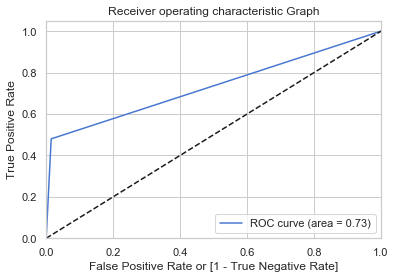

In [199]:
# ROC curve for the final Test Decision Tree Model.
draw_roc(y_test,y_pred_test_clf_gini)

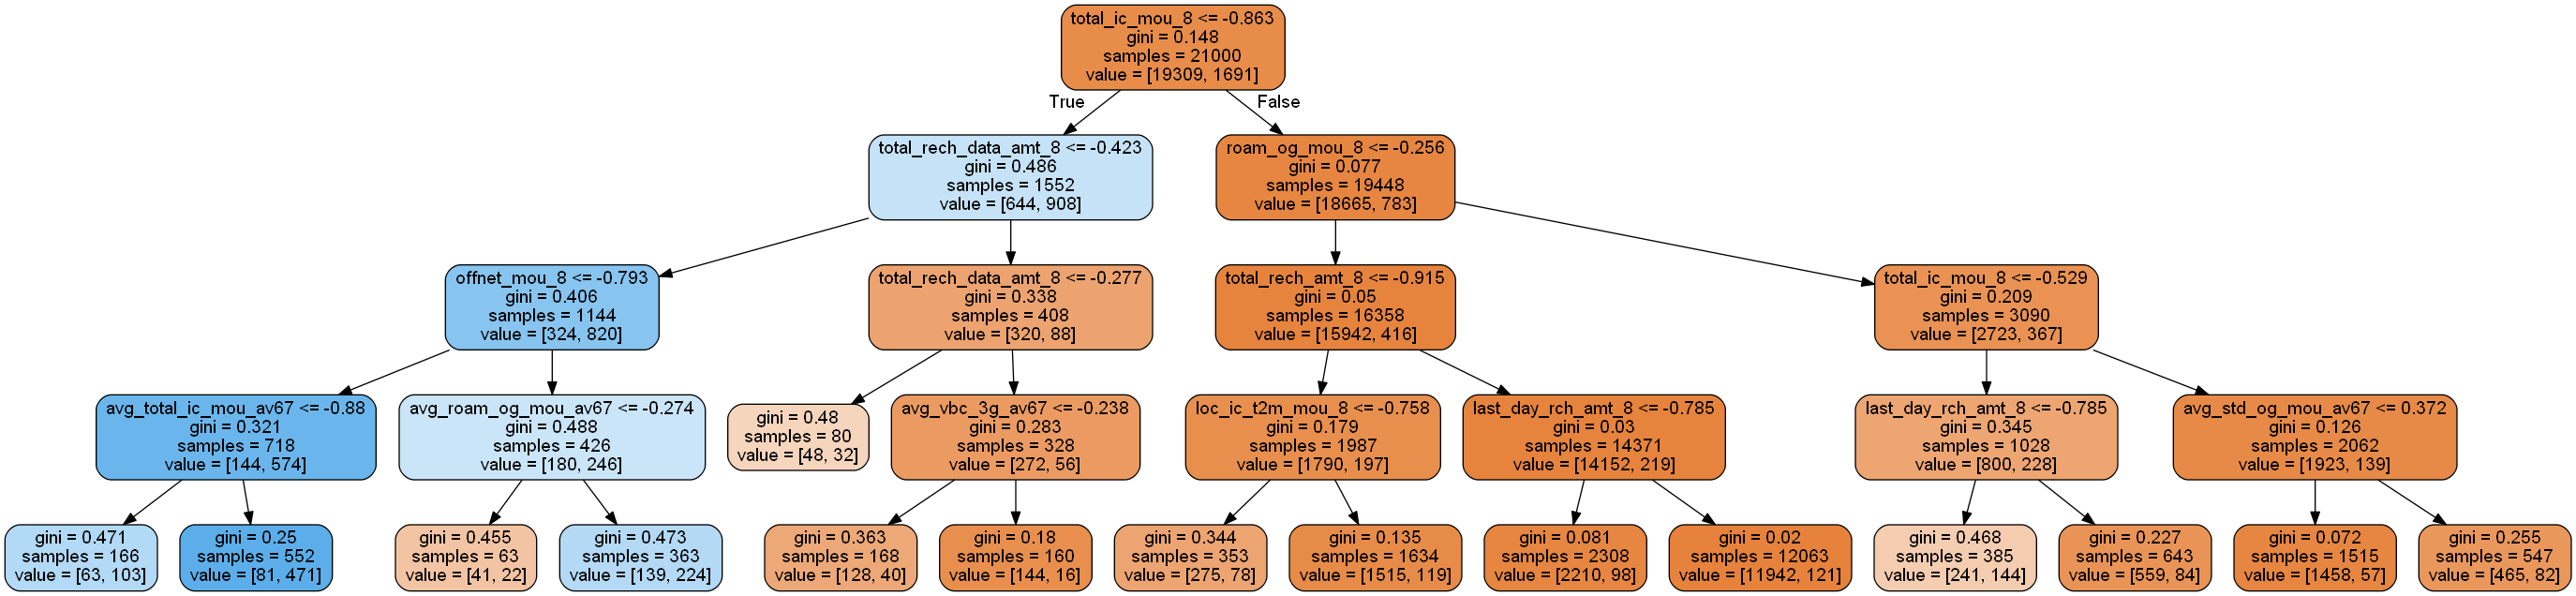

True

In [200]:
# plotting tree with max_depth=4
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
#graph.write_pdf("tree.pdf")

#### **Observations**
>- We have fine tuned import hyper parameters for the Decision Tree and obtain best optimal hyperparameters as below;
   - max_depth=4
   - min_samples_leaf=50
   - min_samples_split=50
>- We have obtained ;
   - accuracy score for train and test set as ~ `0.944` respecively.
   - Precision Score for train and test as ~ `0.74` respectively.
   - Recall Score for train and test set as ~ `0.48` respectively.
   - AUC Score for train and test set as ~`0.73`respectively.
> - As we notice that the recall score for the churned (class-1) are very low due class imbalance.
#### **Inference**
> - We will run the model again with class_weight parameter

### 10.9: Decision Tree - Class Weight Parameter. 

In [201]:
# Create a same final DT model but with class_weight parameter.
# tree with max_depth = 4
clf_bal_gini = DecisionTreeClassifier(criterion = "gini", 
                                      random_state = 100,
                                      max_depth=5, 
                                     min_samples_leaf=50,
                                    min_samples_split=50,
                                class_weight='balanced')
clf_bal_gini.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [202]:
# predict train and test.
y_pred_train_bal_gini = clf_bal_gini.predict(X_train)
y_pred_test_bal_gini = clf_bal_gini.predict(X_test)

#### 10.9.1: Decision Tree with ClassWeight  - Train - Prediction Scores 

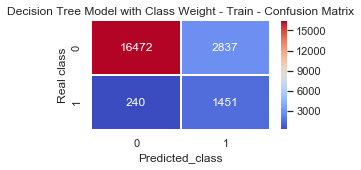


-------------------- Scores -----------------------------------
Decision Tree Model with Class Weight Train Accuracy Score :  0.8534761904761905
Decision Tree Model with Class Weight Train Precision Score : 0.33838619402985076
Decision Tree Model with Class Weight Train Recall Score    : 0.8580721466587817
Decision Tree Model with Class Weight Train AUC Score       : 0.8555729214313122
Decision Tree Model with Class Weight Train Churn Accuracy Rate:(Sensitivity):  0.8580721466587817
Decision Tree Model with Class Weight Train Not-Churn Accuracy Rate:(Specificity): 0.8530736962038428

----------------- Decision Tree Model with Class Weight Train Classification Report -------------------
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     19309
           1       0.34      0.86      0.49      1691

   micro avg       0.85      0.85      0.85     21000
   macro avg       0.66      0.86      0.70     21000
weighted avg       0.93      0.8

In [203]:
# Build Confusion Matrix - Decision Tree Model with ClassWeight - Train predictions.
cnf_matrix_train_bal_dt = metrics.confusion_matrix(y_train,y_pred_train_bal_gini)

# Draw Confusion Matrix for the Decision Tree Model with ClassWeight - Train
draw_confusion_matrix(cnf_matrix_train_bal_dt,
                      "Decision Tree Model with Class Weight - Train - Confusion Matrix")

# Print Other scores and Classy_train,y_pred_train_bal_ginification Report.
model_report(y_train,y_pred_train_bal_gini, "Decision Tree Model with Class Weight Train")

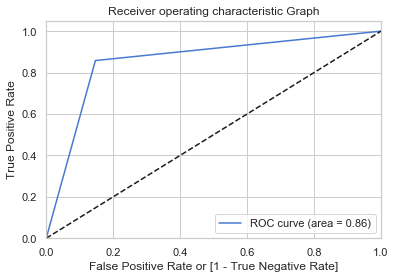

In [204]:
# Draw ROC Curve for Decision Tree Model - Test
draw_roc(y_train,y_pred_train_bal_gini)

#### 10.9.2: Decision Tree with ClassWeight  - Test - Prediction Scores 

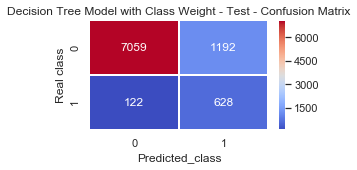


-------------------- Scores -----------------------------------
Decision Tree Model with Class weight Test Accuracy Score :  0.8540162204199533
Decision Tree Model with Class weight Test Precision Score : 0.34505494505494505
Decision Tree Model with Class weight Test Recall Score    : 0.8373333333333334
Decision Tree Model with Class weight Test AUC Score       : 0.8464329980204419
Decision Tree Model with Class weight Test Churn Accuracy Rate:(Sensitivity):  0.8373333333333334
Decision Tree Model with Class weight Test Not-Churn Accuracy Rate:(Specificity): 0.8555326627075506

----------------- Decision Tree Model with Class weight Test Classification Report -------------------
              precision    recall  f1-score   support

           0       0.98      0.86      0.91      8251
           1       0.35      0.84      0.49       750

   micro avg       0.85      0.85      0.85      9001
   macro avg       0.66      0.85      0.70      9001
weighted avg       0.93      0.85      

In [205]:
# Build Confusion Matrix - Decision Tree Model - Test predictions.
cnf_matrix_test_bal_dt = metrics.confusion_matrix(y_test,y_pred_test_bal_gini)

# Draw Confusion Matrix for the Decision Tree Model - Test
draw_confusion_matrix(cnf_matrix_test_bal_dt,
                      "Decision Tree Model with Class Weight - Test - Confusion Matrix")

# Print Other scores and Classification Report.
model_report(y_test,y_pred_test_bal_gini, "Decision Tree Model with Class weight Test")

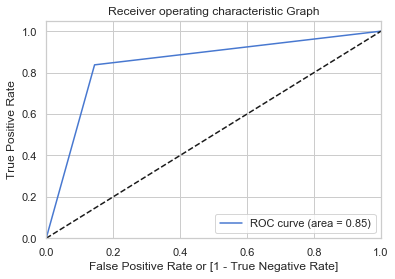

In [206]:
# Draw ROC Curve for Decision Tree Model - Test
draw_roc(y_test,y_pred_test_bal_gini)

#### **Observations**
>- We have re modelled optimal hyper parameters model by including class_weighet parameter.
>- We have obtained an improved score for both train and test set as follows;
   - accuracy score for train and test set as `0.854` respecively.
   - Precision Score for train and test as `0.338` and `0.345` respectively.
   - Recall Score has imrpoved for train and test set as `0.858` and `0.837` respectively.
   - AUC Score for train and test set as `0.855` and `.846` respectively.
> - As we notice that both AUC and recall score has improved considerably using class_weight parameter.
#### **inferences**
> - Let us see the Important Features predicted using the Decision Tree Model.

### 10.10: Decision Tree - Identify Important Features 

In [207]:
# Fetch the important features from the model.
importances = clf_bal_gini.feature_importances_

feature_df = pd.DataFrame(X_train.columns.values[(np.argsort(importances)[::-1])[:15]]) # the top 15 fetures.
feature_df.columns =['Features'] 

#print top 15 features.
feature_df

,Features
0,loc_ic_mou_8
1,roam_og_mou_8
2,total_ic_mou_8
3,total_rech_data_amt_8
4,total_rech_amt_8
5,last_day_rch_amt_8
6,avg_std_og_mou_av67
7,avg_total_rech_num_av67
8,avg_roam_og_mou_av67
9,vol_2g_mb_8


## Step 11:Summary


1. In Summary, We have applied 10 Machine Learning Algorithms as shown in the table below (with scores) ;<br>

   - **Basic Logistic Regression using PCA**
   - **Logistic Regression with PCA - Class_weight hyperparameter**
   - **Logistic Regression with PCA - Random Undersampling of majority Class**
   - **Logistics Regression - SMOTE Model**
   - **Basic Random Forest Model**
   - **Random Forest using Optimal Parameters**
   - **Random Forest using Optimal Parameters with Class_weight**
   - **Random Forest using Optimal Parameters - SMOTE Model**
   - **Decision Tree with Optimal Parameters**
   - **Decision Tree with Optimal Parameters with Class_weight**
   
      
**2. All the models were first created with default parameters, then tuned for Optimal hyperparameters.**<br><br>
**3. As we have noticed, heavy imbalance in data as we can observe from the Churn accuracy i.e. Sensitivity was on the lower side for the unsampled models.**<br><br>
**4. Due to the imbalance, we have used sampling techniques, such as inbuilt loss function (class_weight) and SMOTE.**<br><br>
**5. The fine tuning helped on all models and we observed very noticeable improvement in the Churn Accuracy i.e. Sensitivity**<br><br>
**6. The Overall Accuracy score and the AUC has been consistent and similar other scores for all models.<br><br>
**7. Refer the SUMMARY Table below, which gives the complete snapshot of all the model scores.**<br><br>

In [208]:
# Display Summary Results.
results = [
    ["Basic Logistic Regression using PCA",0.93,0.68,0.29,0.64,0.64,0.29,0.99],
    ["Logistic Regression with PCA - Class_weight hyperparameter",0.82,0.30,0.84,0.83,0.83,0.84,0.82],
    ["Logistic Regression with PCA-Random Undersampling of majority Class",0.86,0.79,0.77,0.83,0.83,0.77,0.90],
    ["Logistics Regression - SMOTE Model",0.85,0.84,0.86,0.85,0.85,0.86,0.83],
    ["Basic Random Forest Model",0.94,0.73,0.43,0.71,0.71,0.43,0.99],
    ["Random Forest using Optimal Parameters",0.94,0.75,0.49,0.74,0.74,0.49,0.98],
    ["Random Forest using Optimal Parameters with Class_weight",0.90,0.44,0.82,0.86,0.86,0.82,0.91],
    ["Random Forest using Optimal Parameters - SMOTE Model",0.90,0.45,0.79,0.85,0.85,0.79,0.91],
    ["Decision Tree with Optimal Parameters",0.94,0.75,0.48,0.73,0.73,0.48,0.99],
    ["Decision Tree with Optimal Parameters with Class_weight",0.85,0.35,0.84,0.85,0.85,0.84,0.86]
  ]
results_df = pd.DataFrame(results)
pd.options.display.max_colwidth = 120
results_df.columns = ['Algorithm','Accuracy','Precision',
                      'Recall','AUC','ROC-AUC',
                      'Churn Accuracy','Non-Churn Accuracy']

#results_df
results_df.sort_values(by=['AUC','Churn Accuracy'],ascending=False)

,Algorithm,Accuracy,Precision,Recall,AUC,ROC-AUC,Churn Accuracy,Non-Churn Accuracy
6,Random Forest using Optimal Parameters with Class_weight,0.90,0.44,0.82,0.86,0.86,0.82,0.91
3,Logistics Regression - SMOTE Model,0.85,0.84,0.86,0.85,0.85,0.86,0.83
9,Decision Tree with Optimal Parameters with Class_weight,0.85,0.35,0.84,0.85,0.85,0.84,0.86
7,Random Forest using Optimal Parameters - SMOTE Model,0.90,0.45,0.79,0.85,0.85,0.79,0.91
1,Logistic Regression with PCA - Class_weight hyperparameter,0.82,0.30,0.84,0.83,0.83,0.84,0.82
2,Logistic Regression with PCA-Random Undersampling of majority Class,0.86,0.79,0.77,0.83,0.83,0.77,0.90
5,Random Forest using Optimal Parameters,0.94,0.75,0.49,0.74,0.74,0.49,0.98
8,Decision Tree with Optimal Parameters,0.94,0.75,0.48,0.73,0.73,0.48,0.99
4,Basic Random Forest Model,0.94,0.73,0.43,0.71,0.71,0.43,0.99
0,Basic Logistic Regression using PCA,0.93,0.68,0.29,0.64,0.64,0.29,0.99


**Conclusion**
1. The **`Class_weight and SMOTE Data Sampling`**  of all the Models perform better than the unsampled data.<br>

2. Among the algorithms following are in the Rank order ;
    1. **`The Random Forest Model using optimal parameters with class_weight (inbuilt Loss Function) Model`** 
    2. **`The Logistic Regression Model - SMOTE Sampling`**<br><br>
     
3. ***In both top models, we achieved the best churn prediction model with AUC Scores more than `85%` and Churn Predicton Accuracy more than `82%`***.

## Step 12: Recommendation

1. The following are the important features which have the impact on determining the customers will churn or not.

     - `Local Incoming and outgoing Minutes of usages for Month 8`
     - `roaming incoming and outgoing minutes of usages for month 8` 
     - `total recharge amount (call & data) for month 8` 
     - `Average Revenue Per Customer for Month 8` 
     - `last day on which recharge made  by the customer for  month 8` 
     - `maximum recharge amount , by the customer for month 8` 
     - `volume of 2g data for the month 8 used by the customer` <br>
     
     
2. **So, If the customer usage is measured by the total minutes of usage and the total recharge amount (call & Data) and in the 8th month is declining as compared to 6th or 7th month, then it is likely that such a customer will churn. So, it is recommended to the operator to reach out to those customers.**